<a href="https://colab.research.google.com/github/FedeGambe/Tesi/blob/main/Logistica%20e%20Esplorative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pre preapazione

In [ ]:
prova

In [ ]:
# prompt: how to drop rows in "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi" major that 150

# Assuming 'Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi' is the column name
index_to_drop = data[data['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'] > 150].index
data = data.drop(index_to_drop)
data_orgiginale = data_orgiginale.drop(index_to_drop)
data_conv = data_conv.drop(index_to_drop)

In [ ]:
data_orgiginale.head()

In [ ]:
data.head()

In [ ]:
data_conv.head()

In [ ]:
print("Le variabili nel dataset:",data_orgiginale.columns.values)

In [ ]:
print(data.isnull().sum())

In [ ]:
numcols = data_orgiginale.select_dtypes(['number']).columns
data_orgiginale[numcols].head()

In [ ]:
catcols = data_orgiginale.select_dtypes(['object']).columns
data_orgiginale[catcols].head()

In [ ]:
for col in catcols:
    print (col, data_orgiginale[col].unique())

# 0. Preparazione

In [ ]:
# Pandas
import pandas as pd
import numpy as np

# Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


import statsmodels.api as sm
from scipy import stats

# Scikit-learn
from sklearn import svm, tree
from sklearn.metrics import *
from sklearn import linear_model


from google.colab import files

In [ ]:
data_ricercatore = pd.read_csv("/content/drive/MyDrive/Tesi/Dataset_partenza - Dataset_partenza.csv", sep=",")
data= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_dummy.csv", sep=",")
data2= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_dummy_v2.csv", sep=",")
#data_conv= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_conv.csv", sep=",")
data_originale= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_originale.csv", sep=",")

# 1. Intro

**Ipotesi**

H1: Il reddito può influenzare l'acquisto di una vettura elettrica? Appartenere ad una classe sociale superiore può aumentare la probilità di acquistare una vettura BEV?

H2: Come influisce sull'acquisto di veicoli BEV la tipologia di auto posseduta

  + H2.1: Possedere, o aver posseduto in passato, un'veicoli PHEV (Plug-in Hybrid) può incentivare l'acquisto di veicoli BEV (elettrici), poiché sono considerate un primo passo verso l'elettrificazione completa.

  + H2.2: Di conseguenza, come cambia la probabilità di acquisto di una vettura BEV se si è possessori, o si è stati possessori in passato, di una vettura ICE (motore a combustione interna), HEV (ibridi, *considerati solo quelli full hybrid*), e GNC (gas naturale compresso)?

  + H2.3: Chi ha posseduto in passato, o possiede, un veicolo BEV ha una probabilità maggiore di acquistarne un ulteriore veicolo elettrico?

H3: Percorrere molta strada al giorno nel tragitto casa-lavoro o effettuare lunghi viaggi può ridurre la probabilità di acquistare veicoli BEV (elettrici).

H4: Le persone che ritengono importante ridurre le emissioni hanno una probabilità maggionre di acquistare una vettura BEV?


In [ ]:
n_variabili= len(data_originale.columns)
print("Il numero di variabili nel dataset è di:", n_variabili)

n_casi= len(data)
print("Il numero di casi nel dataset è di:", n_casi)

Il numero di variabili nel dataset è di: 18
Il numero di casi nel dataset è di: 10688


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 36 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Genere                                                                             10688 non-null  int64  
 1   Classe d'età                                                                       10688 non-null  object 
 2   Classe d'età: <25 vs 45-54                                                         10688 non-null  int64  
 3   Classe d'età: 25-34 vs 45-54                                                       10688 non-null  int64  
 4   Classe d'età: 35-44 vs 45-54                                                       10688 non-null  int64  
 5   Classe d'età: 55-64 vs 45-54                                                       10688 non-null  int

# 3. Analisi Logistica

In [ ]:
all_columns = data.columns.tolist()

exclude_columns = ['Auto attuale', "Classe d'età", "Reddito familiare",
                   "Classe Reddito Familiare", "Livello di istruzione", "Tipologia di auto precedente",
                   "Tipologia di auto attuale", "Numero persone in famiglia", "Casa Indipendente"]

Xind_columns = [col for col in all_columns if col not in exclude_columns and col != 'BEV dummy']

Xind = data[Xind_columns]

In [ ]:
Xind_columns

['Genere',
 "Classe d'età: <25 vs 45-54",
 "Classe d'età: 25-34 vs 45-54",
 "Classe d'età: 35-44 vs 45-54",
 "Classe d'età: 55-64 vs 45-54",
 "Classe d'età: 65-74 vs 45-54",
 "Classe d'età: 75-79 vs 45-54",
 "Classe d'età: >80 vs 45-54",
 'Classe Reddito Familiare: Bassa vs Media',
 'Classe Reddito Familiare: Alta vs Media',
 'Classe Reddito Familiare: Molto alta vs Media',
 'Classe Reddito Familiare: Estremamente alta vs Media',
 'Livello di istruzione: Licenza media vs Laurea 2L o Dottorato',
 'Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato',
 'Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato',
 'Casa di proprietà',
 'Numero di auto in famiglia',
 'Importanza di ridurre le emissioni di gas serra',
 'Tipologia di auto precedente: BEV vs PHEV',
 'Tipologia di auto precedente: HEV vs PHEV',
 'Tipologia di auto precedente: GNC vs PHEV',
 'Tipologia di auto precedente: ICE vs PHEV',
 'Viaggio più lungo negli ultimi 12 mesi',
 'Numero di viaggi s

In [ ]:
Ydip = data['BEV dummy']
Xind = data[Xind_columns]
Xind = sm.add_constant(Xind)


logit_model = sm.Logit(Ydip, Xind)
result = logit_model.fit()


print(result.summary())


intercept = result.params['const']
coefficients = result.params[Xind_columns]
#print("\nIntercept:", intercept)
#print("\nCoefficients:")
#for variable, coefficient in coefficients.items():
  #print(f"{variable}: {coefficient}")



Optimization terminated successfully.
         Current function value: 0.645207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              BEV dummy   No. Observations:                10688
Model:                          Logit   Df Residuals:                    10661
Method:                           MLE   Df Model:                           26
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                 0.06433
Time:                        14:26:00   Log-Likelihood:                -6896.0
converged:                       True   LL-Null:                       -7370.1
Covariance Type:            nonrobust   LLR p-value:                3.451e-183
                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------

In [ ]:
coefficienti_b = round(result.params,3)
p_value = round(result.pvalues,3)
standard_errors =round(result.bse,3)

tabella_diz = {
    'Odds Ratio': np.exp(coefficienti_b),
    'Coefficienti': coefficienti_b,
    'P-value': p_value,
    'Standard Error': standard_errors
}
tabella_riass = pd.DataFrame(tabella_diz)
tabella_sign = tabella_riass[tabella_riass['P-value'] < 0.05]  # solo valori con p-value < 0.05
print(tabella_sign)

                                                    Odds Ratio  Coefficienti  \
const                                                 0.475209        -0.744   
Genere                                                1.246077         0.220   
Classe d'età: 55-64 vs 45-54                          0.793739        -0.231   
Classe d'età: 65-74 vs 45-54                          0.707512        -0.346   
Classe d'età: >80 vs 45-54                            0.503083        -0.687   
Classe Reddito Familiare: Bassa vs Media              0.720363        -0.328   
Classe Reddito Familiare: Alta vs Media               1.216527         0.196   
Classe Reddito Familiare: Molto alta vs Media         1.608014         0.475   
Classe Reddito Familiare: Estremamente alta vs ...    2.117000         0.750   
Livello di istruzione: Diploma o Qualifica prof...    0.697676        -0.360   
Livello di istruzione: Laurea 1L vs Laurea 2L o...    0.886034        -0.121   
Casa di proprietà                       

In [ ]:
coefficienti_b2 = round(result.params,3)
p_value2 = round(result.pvalues,3)
standard_errors2 =round(result.bse,3)

tabella_diz2 = {
    'Odds Ratio': np.exp(-0.7443 + coefficienti_b2)/(1+(np.exp(-0.7443 + coefficienti_b2))),
    'Coefficienti': coefficienti_b2,
    'P-value': p_value2,
    'Standard Error': standard_errors2
}
tabella_riass2 = pd.DataFrame(tabella_diz2)
tabella_sign2 = tabella_riass2[tabella_riass2['P-value'] < 0.05]  # solo valori con p-value < 0.05
print(tabella_sign2)

                                                    Odds Ratio  Coefficienti  \
const                                                 0.184177        -0.744   
Genere                                                0.371847         0.220   
Classe d'età: 55-64 vs 45-54                          0.273825        -0.231   
Classe d'età: 65-74 vs 45-54                          0.251562        -0.346   
Classe d'età: >80 vs 45-54                            0.192896        -0.687   
Classe Reddito Familiare: Bassa vs Media              0.254966        -0.328   
Classe Reddito Familiare: Alta vs Media               0.366259         0.196   
Classe Reddito Familiare: Molto alta vs Media         0.433079         0.475   
Classe Reddito Familiare: Estremamente alta vs ...    0.501425         0.750   
Livello di istruzione: Diploma o Qualifica prof...    0.248935        -0.360   
Livello di istruzione: Laurea 1L vs Laurea 2L o...    0.296233        -0.121   
Casa di proprietà                       

In [ ]:
vmtor= np.exp(-1.509e-05)
print(vmtor)

0.9999849101138535


## prove

In [ ]:
np.exp(-0.6754)

0.5089527987663893

In [ ]:
np.exp(-2.644)

0.07107639460789066

In [ ]:
np.exp(0.907)

2.4768807340649905

In [ ]:
np.exp(-0.7443 + 0.220)/(1+(np.exp(-0.7443 + 0.220)))

0.3718473008518458

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

labels = np.array(['0']*10688)
probs = result.predict()
labels[probs >0.5] = "1"

y_true = Ydip.astype(str) # Convert Ydip to string type
y_pred = labels
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2527 2365]
 [1577 4219]]


In [ ]:
(4219+2527)/10688



0.6311751497005988


# 4. Analisi Variabili: x Ipotesi

## 4.1. Tipologia di veicoli

In [ ]:
#tipologia
tipologia = data['Tipologia di auto attuale'].value_counts()
print("Numero di veicoli ecologici, Elettrici, Ibridi Plug-in, a Idrogeno e Full Hybrid:", tipologia)
print()

#solo auto green: elettriche
auto_green = data['BEV dummy'].value_counts()
print("Numero di veicoli BEV è di:", round(data["BEV dummy"].mean()*100,2), "%", auto_green)

Numero di veicoli ecologici, Elettrici, Ibridi Plug-in, a Idrogeno e Full Hybrid: Tipologia di auto attuale
BEV     5796
PHEV    4568
FCEV     287
HEV       37
Name: count, dtype: int64

Numero di veicoli BEV è di: 54.23 % BEV dummy
1    5796
0    4892
Name: count, dtype: int64


## 4.2. H1 - Reddito

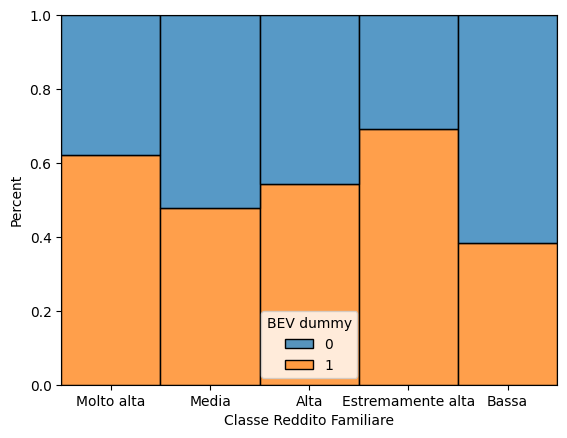


Classe Reddito Familiare
Alta                 54.44
Bassa                38.46
Estremamente alta    69.20
Media                47.71
Molto alta           62.18
Name: BEV dummy, dtype: float64


In [ ]:
sns.histplot(data=data, x="Classe Reddito Familiare", hue= "BEV dummy", stat="percent", multiple="fill")
plt.show()
print()
print(round(data.groupby(data['Classe Reddito Familiare'])["BEV dummy"].mean()*100,2))

In [ ]:
odds_reddito_bm= round(tabella_sign.loc[tabella_sign.index[5], 'Odds Ratio'],5)
odds_reddito_am= round(tabella_sign.loc[tabella_sign.index[6], 'Odds Ratio'],5)
odds_reddito_mam= round(tabella_sign.loc[tabella_sign.index[7], 'Odds Ratio'],5)
odds_reddito_eam= round(tabella_sign.loc[tabella_sign.index[8], 'Odds Ratio'],5)

print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Bassa rispetto ad una persona di classe Media ", odds_reddito_bm)
print("Per una persona di classe Reddito Familiare Bassa la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è:",
      round(odds_reddito_bm-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_bm,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Alta rispetto ad una persona di classe Media ", odds_reddito_am)
print("Per una persona di classe Reddito Familiare Alta la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è:",
      round(odds_reddito_am-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_am,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Molto Alta rispetto ad una persona di classe Media ", odds_reddito_mam)
print("Per una persona di classe Reddito Familiare Molto Alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è:",
      round(odds_reddito_mam-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_mam,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Estremamente alta rispetto ad una persona di classe Media ", odds_reddito_eam)
print("Per una persona di classe Reddito Familiare Estremamente alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è:",
      round(odds_reddito_eam-1,5), ",ovvero la probabilità aumenta del",round(odds_reddito_eam-1,4)*100, "%")

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Bassa rispetto ad una persona di classe Media  0.72036
Per una persona di classe Reddito Familiare Bassa la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è: -0.27964 ,ovvero la probabilità diminuisce del 27.96 %

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Alta rispetto ad una persona di classe Media  1.21653
Per una persona di classe Reddito Familiare Alta la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è: 0.21653 ,ovvero la probabilità diminuisce del -21.65 %

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Molto Alta rispetto ad una persona di classe Media  1.60801
Per una persona di classe Reddito Familiare Molto Alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è: 0.60801 ,ovvero la probabilità diminuisce del -60.8 %

La probab

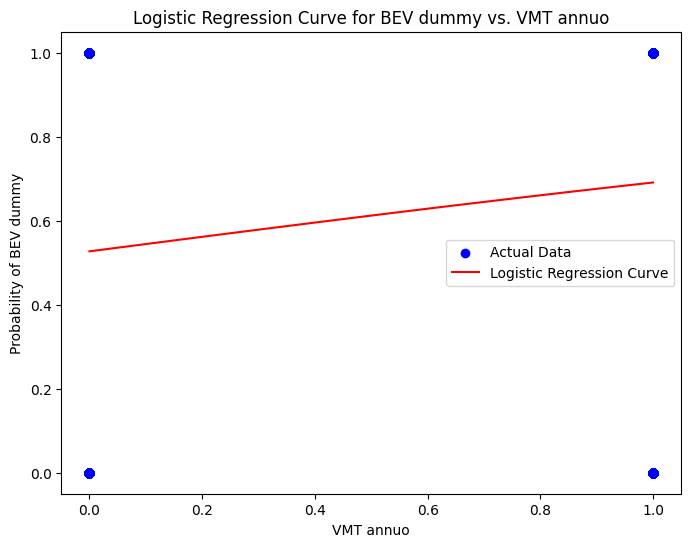

In [ ]:

X = data["Classe Reddito Familiare: Estremamente alta vs Media"]
y = data['BEV dummy']

# Fit a logistic regression model
model = linear_model.LogisticRegression()
model.fit(X.values.reshape(-1, 1), y)

# Generate predictions for a range of VMT values
x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict_proba(x_pred.reshape(-1, 1))[:, 1]

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(x_pred, y_pred, color='red', label='Logistic Regression Curve')
plt.xlabel('VMT annuo')
plt.ylabel('Probability of BEV dummy')
plt.title('Logistic Regression Curve for BEV dummy vs. VMT annuo')
plt.legend()
plt.show()

## 4.3. H2 - Auto posseduta precedentemente

In [ ]:
odds_prec_BEV= round(tabella_sign.loc[tabella_sign.index[14], 'Odds Ratio'],3)

odds_prec_ICE= round(tabella_sign.loc[tabella_sign.index[15], 'Odds Ratio'],3)

print("La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura BEV", odds_prec_BEV)
print(" ", round(odds_prec_BEV-1,3), ",ovvero la probabilità aumenta del",round(odds_prec_BEV-1,4)*100, "%")

print("La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura ICE", odds_prec_ICE)
print(" ", round(odds_prec_ICE-1,3), ",ovvero la probabilità aumenta del",round(odds_prec_ICE-1,4)*100, "%")


La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura BEV 3.473
  2.473 ,ovvero la probabilità aumenta del 247.29999999999998 %
La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura ICE 1.508
  0.508 ,ovvero la probabilità aumenta del 50.8 %


## 4.4. H3 - Influenza delle lunghe distanze percorse sull’acquisto di veicoli BEV


###4.4.1. Distanza casa lavoro

In [ ]:
odds_prec_casalav= round(tabella_sign.loc[tabella_sign.index[17], 'Odds Ratio'],3)

print("La probabilità di aquistare una vettura BEV, in base alla distanza casa-lavoro", odds_prec_casalav)
print(" ", round(odds_prec_casalav-1,3), ",ovvero la probabilità diminuisce del",round(1-odds_prec_casalav,4)*100, "%, ogni miglio percorso in più")
print()
mean_distance_bev_1 = data[data['BEV dummy'] == 1]['Distanza casa-lavoro'].mean()
mean_distance_bev_0 = data[data['BEV dummy'] == 0]['Distanza casa-lavoro'].mean()

print(f"Media della Distanza casa-lavoro per BEV dummy = Si: {mean_distance_bev_1}","miglia")
print(f"Media della Distanza casa-lavoro per BEV dummy = No: {mean_distance_bev_0}","miglia")

print()
print("ogni 2,5 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*2.5,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*2.5*100, "%")
print("ogni 5 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*5,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*5*100, "%")
print("ogni 10 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*10,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*10*100, "%")



La probabilità di aquistare una vettura BEV, in base alla distanza casa-lavoro 0.998
  -0.002 ,ovvero la probabilità diminuisce del 0.2 %, ogni miglio percorso in più

Media della Distanza casa-lavoro per BEV dummy = Si: 17.90839199447895 miglia
Media della Distanza casa-lavoro per BEV dummy = No: 19.804969337694196 miglia

ogni 2,5 miglia aggiuntive probabilità scende di: 0.005 , ovvero scende del: 0.5 %
ogni 5 miglia aggiuntive probabilità scende di: 0.01 , ovvero scende del: 1.0 %
ogni 10 miglia aggiuntive probabilità scende di: 0.02 , ovvero scende del: 2.0 %


###4.4.2. N. Viaggi >200 miglia all'anno

In [ ]:
odds_prec_nviaggi= round(tabella_sign.loc[tabella_sign.index[16], 'Odds Ratio'],3)
print("La probabilità di aquistare una vettura BEV in base al numero di viaggi superiore a 200 miglia", odds_prec_nviaggi)
print(" ", round(odds_prec_nviaggi-1,3), ",ovvero la probabilità diminuisce del",round(1-odds_prec_nviaggi,4)*100, "%")
print()
print()
print("Come diminuisce la probabilità in base al n. dei viaggi rispetto a che non li effettua:")
print()
print("per chi effettua 1 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*1,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*1*100,4), "%")
print("per chi effettua 2 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*2,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*2*100,4), "%")
print("per chi effettua 3 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*3,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*3*100,4), "%")
print("per chi effettua 4 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*4,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*4*100,4), "%")
print("per chi effettua 5 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*5,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*5*100,4), "%")
print("per chi effettua 6 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*6,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*6*100,4), "%")

La probabilità di aquistare una vettura BEV in base al numero di viaggi superiore a 200 miglia 0.966
  -0.034 ,ovvero la probabilità diminuisce del 3.4000000000000004 %


Come diminuisce la probabilità in base al n. dei viaggi rispetto a che non li effettua:

per chi effettua 1 viaggio di 200 miglia all'anno la probabilità scende di: 0.034 , ovvero scende del: 3.4 %
per chi effettua 2 viaggio di 200 miglia all'anno la probabilità scende di: 0.068 , ovvero scende del: 6.8 %
per chi effettua 3 viaggio di 200 miglia all'anno la probabilità scende di: 0.102 , ovvero scende del: 10.2 %
per chi effettua 4 viaggio di 200 miglia all'anno la probabilità scende di: 0.136 , ovvero scende del: 13.6 %
per chi effettua 5 viaggio di 200 miglia all'anno la probabilità scende di: 0.17 , ovvero scende del: 17.0 %
per chi effettua 6 viaggio di 200 miglia all'anno la probabilità scende di: 0.204 , ovvero scende del: 20.4 %


###4.4.3. VMT

In [ ]:
odds_VMT = vmtor
print(odds_VMT)
print()
VMT_calcolato = (-(1 - odds_VMT)*100) * data['VMT annuo']


0.9999849101138535



In [ ]:
print((1-odds_VMT)*378000)

5.703976963381985


In [ ]:
print(round(1-odds_VMT,6)*100, "%")

0.0015 %


In [ ]:
print(round(1-odds_VMT,8)*100*1000, "%")

1.509 %


In [ ]:
print(round(1-odds_VMT,8)*100*2500, "%")

3.7725 %


In [ ]:
data['VMT annuo']

,VMT annuo
0,14622
1,9197
2,5082
3,13025
4,18000
...,...
10683,16186
10684,14409
10685,20000
10686,13000


In [ ]:
VMT_calcolato

,VMT annuo
0,-22.064432
1,-13.878168
2,-7.668680
3,-19.654577
4,-27.161795
...,...
10683,-24.424490
10684,-21.743017
10685,-30.179772
10686,-19.616852


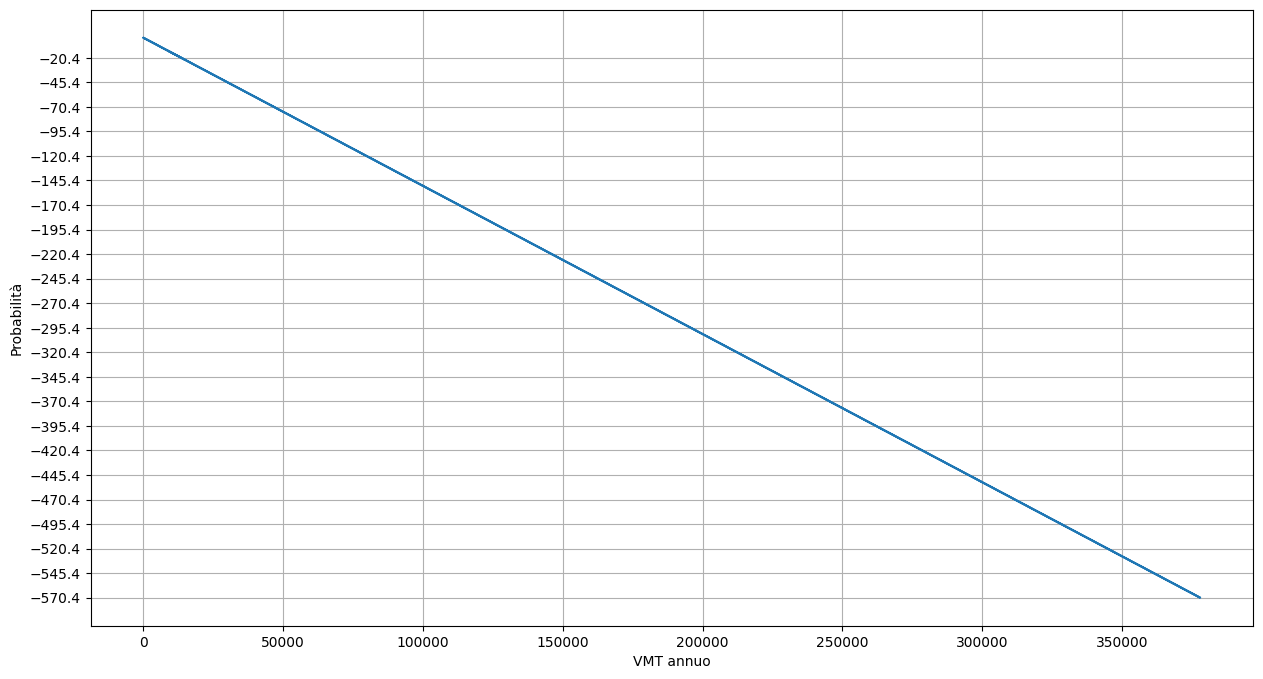

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data['VMT annuo'], VMT_calcolato, linestyle='-')
plt.xlabel('VMT annuo')
plt.ylabel('Probabilità')
plt.title('')
plt.grid(True)
plt.yticks(np.arange(min(VMT_calcolato), max(VMT_calcolato) + 1, 25))
plt.show()

In [ ]:
print("ogni 5000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*5000,3), ", ovvero scende del:", round((1-odds_VMT)*5000*100,2), "%")
print("ogni 10000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*10000,3), ", ovvero scende del:", round((1-odds_VMT)*10000*100,2), "%")
print("ogni 15000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*15000,3), ", ovvero scende del:", round((1-odds_VMT)*15000*100,2), "%")

ogni 5000 miglia percorse in più annualmente la probabilità scende di: 0.075 , ovvero scende del: 7.54 %
ogni 10000 miglia percorse in più annualmente la probabilità scende di: 0.151 , ovvero scende del: 15.09 %
ogni 15000 miglia percorse in più annualmente la probabilità scende di: 0.226 , ovvero scende del: 22.63 %


In [ ]:
print("ogni 14000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*14000,3), ", ovvero scende del:", round((1-odds_VMT)*14000*100,2), "%")
print("ogni 15000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*15000,3), ", ovvero scende del:", round((1-odds_VMT)*15000*100,2), "%")

print("ogni 17000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*17000,3), ", ovvero scende del:", round((1-odds_VMT)*17000*100,2), "%")

ogni 14000 miglia percorsi annualmente la probabilità scende di: 0.211 , ovvero scende del: 21.13 %
ogni 15000 miglia percorsi annualmente la probabilità scende di: 0.226 , ovvero scende del: 22.63 %
ogni 17000 miglia percorsi annualmente la probabilità scende di: 0.257 , ovvero scende del: 25.65 %


In [ ]:
vmt_annuo_mean_by_bev = data.groupby('BEV dummy')['VMT annuo'].mean()
print(vmt_annuo_mean_by_bev)
vmt_annuo_mean_bev = vmt_annuo_mean_by_bev.get(1, None)
if vmt_annuo_mean_bev is not None:
  print("Mean VMT annuo for BEV owners:", vmt_annuo_mean_bev)
else:
  print("No BEV owners found in the data.")

BEV dummy
0    16050.914146
1    12784.542961
Name: VMT annuo, dtype: float64
Mean VMT annuo for BEV owners: 12784.542960662526


## 4.5. H4 - Importanza della Riduzione delle Emissioni

In [ ]:
print("punteggi medii dei possessori di auto green:",round(data.groupby('BEV dummy')["Importanza di ridurre le emissioni di gas serra"].mean(),2))
print()

punteggi medii dei possessori di auto green: BEV dummy
0    1.50
1    1.72
Name: Importanza di ridurre le emissioni di gas serra, dtype: float64



La sostenibile media di gas serra è di: 1.62 , il sostenibile mediano è di: 3.0



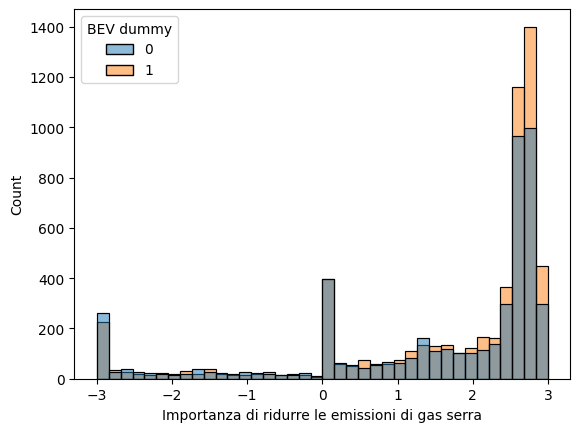

In [ ]:
sostenibile_mediano =round(data['Importanza di ridurre le emissioni di gas serra'].median(),0)
sostenibile_medio = round(data['Importanza di ridurre le emissioni di gas serra'].mean(),2)

print("La sostenibile media di gas serra è di:", sostenibile_medio, ", il sostenibile mediano è di:", sostenibile_mediano)
print()
sns.histplot(data=data, x="Importanza di ridurre le emissioni di gas serra", hue= "BEV dummy")
plt.show()

In [ ]:
preocc_elev = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>2)]["BEV dummy"].mean()*100,2)
preocc_medio_alta = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>0.5) & (data["Importanza di ridurre le emissioni di gas serra"]<=2)]["BEV dummy"].mean()*100,2)
preocc_media = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>-0.5) & (data["Importanza di ridurre le emissioni di gas serra"]<=0.5)]["BEV dummy"].mean()*100,2)
preocc_medio_bassa = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>-2) & (data["Importanza di ridurre le emissioni di gas serra"]<=-0.5)]["BEV dummy"].mean()*100,2)
preocc_bassa = round(data[(data["Importanza di ridurre le emissioni di gas serra"]<=-2)]["BEV dummy"].mean()*100,2)

print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione elevata verso l'ambiente", preocc_elev)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio alta verso l'ambiente",preocc_medio_alta)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente", preocc_media)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente",preocc_medio_bassa)
print("Percentuale di chi possiede una vettura BEV e non nessuna ha una preoccupazione verso l'ambiente", preocc_bassa)


Percentuale di chi possiede una vettura BEV e ha una preoccupazione elevata verso l'ambiente 56.72
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio alta verso l'ambiente 52.54
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente 48.98
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente 49.88
Percentuale di chi possiede una vettura BEV e non nessuna ha una preoccupazione verso l'ambiente 46.8


In [ ]:
odds_amb = odds_prec_nviaggi= round(tabella_sign.loc[tabella_sign.index[13], 'Odds Ratio'],4)
print(odds_amb)
print()
print("La probabilità per chi ha una preoccupazione elevata verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*2*100,2), "%, a", round((odds_amb-1)*3*100,2), "%")
print("La probabilità per chi ha una preoccupazione medio alta verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*0.5*100,2), "%, a", round((odds_amb-1)*2*100,2), "%")
print("La probabilità per chi ha una preoccupazione media verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-0.5*100,2), "%, a", round((odds_amb-1)*0.5*100,2), "%")
print("La probabilità per chi ha una preoccupazione medio bassa verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-2*100,2), "%, a", round((odds_amb-1)*-0.5*100,2), "%")
print("La probabilità per chi non ha alcuna una preoccupazione verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-3*100,2), "%, a", round((odds_amb-1)*-2*100,2), "%")



1.1052

La probabilità per chi ha una preoccupazione elevata verso l'ambiente, la probabilità varia da: 21.04 %, a 31.56 %
La probabilità per chi ha una preoccupazione medio alta verso l'ambiente, la probabilità varia da: 5.26 %, a 21.04 %
La probabilità per chi ha una preoccupazione media verso l'ambiente, la probabilità varia da: -5.26 %, a 5.26 %
La probabilità per chi ha una preoccupazione medio bassa verso l'ambiente, la probabilità varia da: -21.04 %, a -5.26 %
La probabilità per chi non ha alcuna una preoccupazione verso l'ambiente, la probabilità varia da: -31.56 %, a -21.04 %




---



In [ ]:
print(round((odds_amb-1)*2*100,2))
print()
print(round((odds_amb-1)*1*100,2))


21.04

10.52


# 5. Altre Variabili

## 5.2. Età

In [ ]:
print("Età media dei possessori di auto green:",round(data.groupby('BEV dummy')["Classe d'età"].mean(),2))
print()
print("Percentuali di possesso di auto green per:",round(data.groupby(data["Classe d'età"])['BEV dummy'].mean(),2))

In [ ]:
odds_eta1 = round(tabella_sign.loc[tabella_sign.index[2], 'Odds Ratio'],5)
odds_eta2 = round(tabella_sign.loc[tabella_sign.index[3], 'Odds Ratio'],5)
odds_eta3 = round(tabella_sign.loc[tabella_sign.index[4], 'Odds Ratio'],5)
print(odds_eta1, odds_eta2, odds_eta3)
print()
print("La probabilità per chi è classe d'età: 55-64 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta1),3), ", quindi diminusice del", round((1-odds_eta1)*100,2), "%")
print("La probabilità per chi è classe d'età: 65-74 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta2),3), ", quindi diminusice del", round((1-odds_eta2)*100,2), "%")
print("La probabilità per chi è classe d'età: >80 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta3),3), ", quindi diminusice del", round((1-odds_eta3)*100,2), "%")



## 5.1. Genere

In [ ]:
print("La percetuale in base al Genere di chi ha un'auto green: ") #il 55,46 delle persone di sesso femminile possiede un'auto elettrica contro il 50,6 di quello maschile
print()
print(round(data.groupby("Genere")['BEV dummy'].mean()*100,2))
print()
print()
odds_gen= round(tabella_sign.loc[tabella_sign.index[1], 'Odds Ratio'],5)

print(odds_gen)
print()
print("La probabilità per una persona di sesso maschile rispetto ad una di sesso femminile di avere un'auto elettrica, aumenta di:" ,round((odds_gen-1),3), ", quindi aumenta del", round((odds_gen-1)*100,2), "%")



La percetuale in base al Genere di chi ha un'auto green: 

Genere
0    50.62
1    55.43
Name: BEV dummy, dtype: float64




NameError: name 'tabella_sign' is not defined

## 5.3. Genere x Età: Interazione

In [ ]:
print("L'età in base al genere dei casi nel dataset:",round(data.groupby(data["Genere"])["Classe d'età"].count(),2))
print()
print("L'età media dei possessori di auto puramente elettriche:", round(data.groupby(data['BEV dummy'])["Classe d'età"].count(),2))

In [ ]:
print("Percentuali di possesso di sesso maschile di auto green per:",round(data[(data["Genere"]== "Maschio")].groupby(data["Classe d'età"])['BEV dummy'].mean(),2))
print()
print("Percentuali di possesso di sesso femminile di auto green per:",round(data[(data["Genere"]== "Femmina")].groupby(data["Classe d'età"])['BEV dummy'].mean(),2))

In [ ]:
under25_genere = round(data[(data["Età"]>=18) & (data["Età"]<25)].groupby("Genere")['BEV dummy'].mean()*100,2)
under25 = round(data.groupby(data["Età"]<25)['BEV dummy'].mean()*100,2)
print("La percetuale di persone under25 che ha un'auto elettrica è di: ")
print(under25)
print()
print("di cui la percetuale di suddette persone  che ha un'auto elettrica, in base al Genere, è di: ")
print(under25_genere)

In [ ]:
under45_genere = round(data[(data["Età"]>=25) & (data["Età"]<45)].groupby(data["Genere"])['BEV dummy'].mean()*100,2)
under45 = round(data[(data["Età"]>=25) & (data["Età"]<45)]['BEV dummy'].mean()*100,2)

print("La percetuale di persone da 25 a 45 anni che ha un'auto elettrica è di: ")
print(under45)
print()
print("di cui la percetuale di suddette persone che ha un'auto elettrica, in base al Genere, è di: ")
print(under45_genere)

In [ ]:
under65_genere = round(data[(data["Età"]>=45) & (data["Età"]<65)].groupby(data["Genere"])['BEV dummy'].mean()*100,2)
under65 = round(data[(data["Età"]>=45) & (data["Età"]<65)]['BEV dummy'].mean()*100,2)
print("La percetuale di persone da 45 a 65 anni che ha un'auto elettrica è di: ")
print(under65)
print()
print("di cui la percetuale di suddette persone che ha un'auto elettrica, in base al Genere, è di: ")
print(under65_genere)

In [ ]:
over65_genere = round(data[data["Età"]>65].groupby(data["Genere"])['BEV dummy'].mean()*100,2)
over65 = round(data[data["Età"]>65]['BEV dummy'].mean()*100,2)

print("La percetuale di persone over65 che ha un'auto elettrica è di: ")
print(over65)
print()
print("di cui la percetuale di suddette persone che ha un'auto elettrica, in base al Genere, è di: ")
print(over65_genere)

## 5.3. Reddito

In [ ]:
print("Percentuali di possesso di sesso maschile di auto green per:",round(data[(data["Genere"]== "Maschio")].groupby(data["Classe Reddito Familiare"])['BEV dummy'].mean(),2))
print()
print("Percentuali di possesso di sesso femminile di auto green per:",round(data[(data["Genere"]== "Femmina")].groupby(data["Classe Reddito Familiare"])['BEV dummy'].mean(),2))

sono molto simili, **non significativo**

In [ ]:
odds_red1 = round(tabella_sign.loc[tabella_sign.index[5], 'Odds Ratio'],5)
odds_red2 = round(tabella_sign.loc[tabella_sign.index[6], 'Odds Ratio'],5)
odds_red3 = round(tabella_sign.loc[tabella_sign.index[7], 'Odds Ratio'],5)
odds_red4 = round(tabella_sign.loc[tabella_sign.index[8], 'Odds Ratio'],5)
print(odds_red1, odds_red2, odds_red3, odds_red4)
print()
print("La probabilità per chi è classe di reddito bassa rispetto ad una media di possedere un'auto elettrica, scende di:" ,round((1-odds_red1),3),
      ", quindi diminusice del", round((1-odds_red1)*100,2), "%")
print("La probabilità per chi è classe di reddito alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red2-1),3),
      ", quindi aumenta del", round((odds_red2-1)*100,2), "%")
print("La probabilità per chi è classe di reddito molto alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red3-1),3),
      ", quindi aumenta del", round((odds_red3-1)*100,2), "%")
print("La probabilità per chi è classe di reddito estremamente alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red4-1),3),
      ", quindi aumenta del", round((odds_red4-1)*100,2), "%")

## 5.4. Livello d'istruzione

In [ ]:
odds_ist1 = round(tabella_sign.loc[tabella_sign.index[9], 'Odds Ratio'],5)
odds_ist2 = round(tabella_sign.loc[tabella_sign.index[10], 'Odds Ratio'],5)
print(odds_ist1, odds_ist2)
print()
print("La probabilità per chi ha un diploma rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di:" ,round((1-odds_ist1),3),
      ", quindi diminusice del", round((1-odds_ist1)*100,2), "%")
print("La probabilità per chi ha una laurea triennale rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di:" ,round((1-odds_ist2),3),
      ", quindi diminusice del", round((1-odds_ist2)*100,2), "%")



```
# analizzare l'istruzione, e confrontarlo con l'età per vedere se a età alte la var istruzione è molto correlata con reddito
```



In [ ]:
print("La percetuale di chi ha un'auto green in base al: ")
print()
print(round(data.groupby("Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato")['BEV dummy'].mean()*100,2))
print()
print(round(data.groupby("Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato")['BEV dummy'].mean()*100,2))

In [ ]:
Istruzione_quant = {'Basso': 1, 'Medio-Basso': 2, 'Medio-Alto': 3, 'Alto': 4}
data['Livello di istruzione (quantitativo)'] = data['Livello di istruzione'].map(Istruzione_quant)
print("Percentuali di chi possiede un'auto elettrica in base al:")
print(data.groupby('Livello di istruzione (quantitativo)')['BEV dummy'].mean()*100)

#basso vs Alto: non significativa

## 5.6. Livello d'istruzione x .... : Interazione

In [ ]:
from scipy.stats import kendalltau, spearmanr

# Assuming 'data' DataFrame is already loaded

# Calculate Somers' D (a variation of Kendall's tau-b)
tau, p_value = kendalltau(data['Livello di istruzione'], data['Classe Reddito Familiare'])
print(f"Somers' D (Kendall's Tau-b): {tau:.3f}, p-value: {p_value:.3f}")


# Calculate Kendall's tau-b
tau, p_value = kendalltau(data['Livello di istruzione'], data['Classe Reddito Familiare'])
print(f"Kendall's Tau-b: {tau:.3f}, p-value: {p_value:.3f}")


#Calculate Spearman's rank correlation
rho, pval = spearmanr(data['Livello di istruzione'], data['Classe Reddito Familiare'])
print(f"Spearman's rank correlation: {rho:.3f}, p-value: {pval:.3f}")

Somers' D (Kendall's Tau-b): -0.003, p-value: 0.727
Kendall's Tau-b: -0.003, p-value: 0.727
Spearman's rank correlation: -0.004, p-value: 0.712


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
data['Livello di istruzione_q'] = data['Livello di istruzione'].map({'Basso':0, 'Medio-Basso':1, 'Medio-Alto':2, 'Alto':3})

# the independent variables set
X = data[['Livello di istruzione_q', 'Reddito familiare', 'Età']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)


In [ ]:
# prompt: calcolate the correlation between two variable

# Assuming 'variable1' and 'variable2' are the names of the columns in your DataFrame 'data'
correlation = data['Livello di istruzione_q'].corr(data['Reddito familiare'])
print(correlation)


## 5.7. Numero di auto in famiglia

In [ ]:
odds_casa = round(tabella_sign.loc[tabella_sign.index[11], 'Odds Ratio'],5)
odds_fam = round(tabella_sign.loc[tabella_sign.index[12], 'Odds Ratio'],5)
print(odds_casa, odds_fam)
print()
print("La probabilità per chi vive in una casa di proprietà di possedere un'auto elettrica rispetto a chi vive in affitto, sale di:" ,round((odds_casa-1),3), ", aumenta del", round((odds_casa-1)*100,2), "%")
print()
print("La probabilità per ogni indiviudo in più in famiglia di possedere un'auto elettrica, sale di:" ,round((1-odds_eta2),3), ", quindi aumenta del", round((1-odds_eta2)*100,2), "%")
print("La probabilità per 2 indiviudi in più in famiglia di possedere un'auto elettrica, sale di:" ,round((1-odds_eta2)*2,3), ", quindi aumenta del", round((1-odds_eta2)*100*2,2), "%")



In [ ]:
print("Media numero di persone per famiglia:", round(data["Numero persone in famiglia"].mean(),2)) #in linea con il n medio di auto per famiglia in Cal: 2,5
print()
print("Percentuale di auto elettriche in base al:",round(data.groupby(data["Numero persone in famiglia"])['BEV dummy'].mean(),2))

In [ ]:
print("Media numero di auto per famiglia:", round(data["Numero di auto in famiglia"].mean(),2)) #in linea con il n medio di auto per famiglia in Cal: 2,5
print()
print("Percentuale di auto elettriche in base al:",round(data.groupby(data["Numero di auto in famiglia"])['BEV dummy'].mean(),2))

In [ ]:
odds_nauto = np.exp(0.1207)
print(odds_nauto)
print()
print("Per ogni auto in più in famiglia, la probabilità di avere un veicolo BEV, sale di:" ,round((odds_nauto-1),3), ", quindi aumenta del", round((odds_nauto-1)*100,2), "%")

# 6. Var quant to ordinali

## 6.1. Data_eda_1 x vif

In [ ]:
data_originale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere                                                        10688 non-null  object 
 1   Classe d'età                                                  10688 non-null  object 
 2   Reddito familiare                                             10688 non-null  int64  
 3   Classe Reddito Familiare                                      10688 non-null  object 
 4   Livello di istruzione                                         10688 non-null  object 
 5   Casa di proprietà                                             10688 non-null  object 
 6   Casa Indipendente                                             10688 non-null  object 
 7   Numero persone in famiglia                                    10688

In [ ]:
data_eda_1 = data_originale.copy()
#data_eda_1.drop(columns=['Reddito familiare'])
data_eda_1['Casa Indipendente'] = data_originale['Casa Indipendente'].replace({0: 'No', 1: 'Si'})
data_eda_1['Casa di proprietà'] = data_originale['Casa di proprietà'].replace({0: 'No', 1: 'Si'})

In [ ]:
data_eda_1.head()

,Genere,Classe d'età,Reddito familiare,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Numero persone in famiglia,Numero di auto in famiglia,Importanza di ridurre le emissioni di gas serra,Tipologia di auto precedente,Auto attuale,Tipologia di auto attuale,BEV dummy,Viaggio più lungo negli ultimi 12 mesi,Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi,Distanza casa-lavoro,VMT annuo
0,Maschio,65-74,275000,Molto alta,Laurea 1L,Si,Si,2.0,2.0,2.52,PHEV,Toyota Mirai FCEV,FCEV,0.0,483.14,1,0.01,14622
1,Maschio,65-74,275000,Molto alta,Laurea 2L o Dottorato,Si,Si,3.0,3.0,2.76,HEV,Toyota Mirai FCEV,FCEV,0.0,568.09,1,10.69,9197
2,Maschio,55-64,125000,Media,Diploma o Qualifica professionale,Si,Si,2.0,3.0,2.60,PHEV,Toyota Mirai FCEV,FCEV,0.0,255.16,1,17.63,5082
3,Maschio,75-79,175000,Alta,Laurea 2L o Dottorato,Si,Si,2.0,2.0,1.23,HEV,Toyota Mirai FCEV,FCEV,0.0,312.78,1,3.53,13025
4,Maschio,45-54,500000,Estremamente alta,Diploma o Qualifica professionale,Si,Si,3.0,3.0,1.08,HEV,Toyota Mirai FCEV,FCEV,0.0,125.79,0,28.05,18000


### Numero famiglia

La media è di: 2.94 , la mediana è di: 3.0 e la devianza standard è di: 1.24

0.00     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    13.0
Name: Numero persone in famiglia, dtype: float64



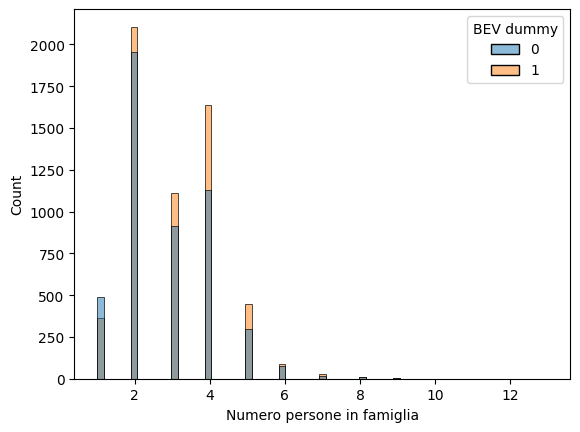

In [ ]:
famiglia_mediano =round(data_originale['Numero persone in famiglia'].median(),0)
famiglia_medio = round(data_originale['Numero persone in famiglia'].mean(),2)
famiglia_std = round(data_originale['Numero persone in famiglia'].std(),2)

print("La media è di:", famiglia_medio, ", la mediana è di:", famiglia_mediano, "e la devianza standard è di:", famiglia_std)
print()
percentili = data_originale['Numero persone in famiglia'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Numero persone in famiglia", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 1.1, 2.1, 3.1, 4.1, float('inf')]
labels = ['Sigle', 'Coppie', 'Famiglie con 1 figlio', 'Famiglie con 2 figli', 'Famiglie con 3 o più di 3 figli']

data_eda_1['Numero persone in famiglia categoriale'] = pd.cut(data_originale['Numero persone in famiglia'], bins=bins, labels=labels, right=False)

print(data_eda_1[['Numero persone in famiglia', 'Numero persone in famiglia categoriale']].head())
#data_eda_1.drop(columns=['Numero persone in famiglia'], inplace=True)

   Numero persone in famiglia Numero persone in famiglia categoriale
0                         2.0                                 Coppie
1                         3.0                  Famiglie con 1 figlio
2                         2.0                                 Coppie
3                         2.0                                 Coppie
4                         3.0                  Famiglie con 1 figlio


In [ ]:
famiglia_counts = data_eda_1['Numero persone in famiglia categoriale'].value_counts()

print(famiglia_counts)

Numero persone in famiglia categoriale
Coppie                             4059
Famiglie con 2 figli               2767
Famiglie con 1 figlio              2025
Famiglie con 3 o più di 3 figli     983
Sigle                               854
Name: count, dtype: int64


### Numero auto in famiglia

La media è di: 2.52 , la mediana è di: 2.0 e la devianza standard è di: 0.92

0.00    1.0
0.25    2.0
0.50    2.0
0.75    3.0
1.00    5.0
Name: Numero di auto in famiglia, dtype: float64



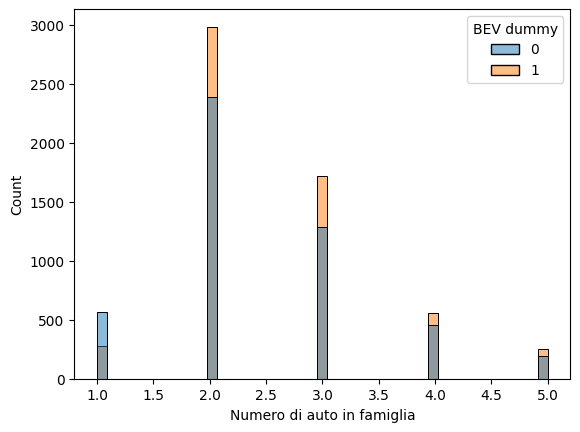

In [ ]:
autfam_mediano =round(data_originale['Numero di auto in famiglia'].median(),0)
autfam_medio = round(data_originale['Numero di auto in famiglia'].mean(),2)
autfam_std = round(data_originale['Numero di auto in famiglia'].std(),2)

print("La media è di:", autfam_medio, ", la mediana è di:", autfam_mediano, "e la devianza standard è di:", autfam_std)
print()
percentili = data_originale['Numero di auto in famiglia'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Numero di auto in famiglia", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 1.1, 2.1, 3.1, float('inf')]
labels = ['Un Auto', 'Due Auto', 'Tre Auto', 'Più di quattro Auto']

data_eda_1['Numero di auto in famiglia categoriale'] = pd.cut(data_originale['Numero di auto in famiglia'], bins=bins, labels=labels, right=False)

print(data_eda_1[['Numero di auto in famiglia', 'Numero di auto in famiglia categoriale']].head())
#data_eda_1.drop(columns=['Numero di auto in famiglia'], inplace=True)

   Numero di auto in famiglia Numero di auto in famiglia categoriale
0                         2.0                               Due Auto
1                         3.0                               Tre Auto
2                         3.0                               Tre Auto
3                         2.0                               Due Auto
4                         3.0                               Tre Auto


In [ ]:
famiglia_counts = data_eda_1['Numero di auto in famiglia categoriale'].value_counts()

print(famiglia_counts)

Numero di auto in famiglia categoriale
Due Auto               5377
Tre Auto               3006
Più di quattro Auto    1464
Un Auto                 841
Name: count, dtype: int64


### download

In [ ]:
data_eda_1.info()

In [ ]:
data_eda_vif = data_eda_1[[
    'Numero persone in famiglia, categoriale',
    'Numero di auto in famiglia, categoriale',
    'Casa di proprietà',
    'Casa Indipendente'
]]

In [ ]:
data_eda_vif.info()

In [ ]:
#data_eda_vif.to_csv('data_eda_vif.csv', encoding = 'utf-8-sig')
#files.download('data_eda_vif.csv')

In [ ]:
print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))


## 6.2. data_eda_2 x MCA

In [ ]:
data_eda_2 = data_eda_1.copy()

In [ ]:
print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa Indipendente'], data_eda_2['BEV dummy']))


BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983


### VMT

Il VMT medio è di: 14279.59 , il VMT mediano è di: 11557.0 e la devianza standard è di: 15965.64

0.00         7.0
0.25      8395.5
0.50     11557.0
0.75     15947.0
1.00    378000.0
Name: VMT annuo, dtype: float64



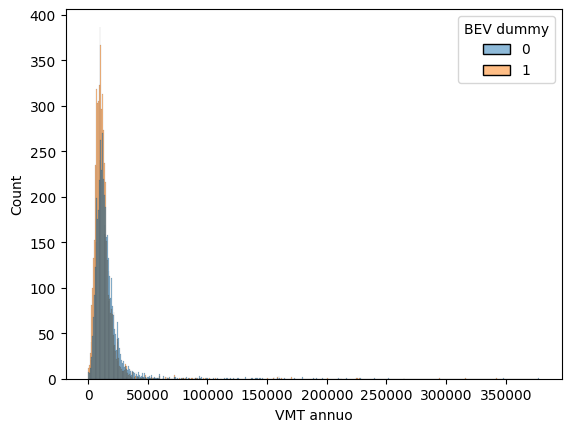

In [ ]:
VMT_mediano =round(data['VMT annuo'].median(),0)
VMT_medio = round(data['VMT annuo'].mean(),2)
VMT_std = round(data['VMT annuo'].std(),2)

print("Il VMT medio è di:", VMT_medio, ", il VMT mediano è di:", VMT_mediano, "e la devianza standard è di:", VMT_std)
print()
percentili = data['VMT annuo'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="VMT annuo", hue= "BEV dummy")
plt.show()

In [ ]:
vmt_1 = 6.720000
vmt_2 = 8391.000000
vmt_3 = 11557
vmt_4 = 15960
vmt_5 = 378000

punto1_vmt = vmt_1
punto2_vmt = (vmt_2 - vmt_1)/2+vmt_1
punto3_vmt = (vmt_3 - vmt_2)/2+vmt_2
punto4_vmt = (vmt_4 - vmt_3)/2+vmt_3
punto5_vmt = (vmt_5 - vmt_4)/2+vmt_4
punto6_vmt = vmt_5

Classe_vmt_1 = [punto1_vmt, punto2_vmt]
Classe_vmt_2 = [punto2_vmt, punto3_vmt]
Classe_vmt_3 = [punto3_vmt, punto4_vmt]
Classe_vmt_4 = [punto4_vmt, punto5_vmt]
Classe_vmt_5 = [punto5_vmt, punto6_vmt]

print("VMT molto basso:", [round(x,0) for x in Classe_vmt_1])
print("VMT basso:", [round(x,0) for x in Classe_vmt_2])
print("VMT medio:", [round(x,0) for x in Classe_vmt_3])
print("VMT alto:", [round(x,0) for x in Classe_vmt_4])
print("VMT molto alto:", [round(x,0) for x in Classe_vmt_5])

VMT molto basso: [7.0, 4199.0]
VMT basso: [4199.0, 9974.0]
VMT medio: [9974.0, 13758.0]
VMT alto: [13758.0, 196980.0]
VMT molto alto: [196980.0, 378000]


In [ ]:
bins = [0, punto2_vmt, punto3_vmt, punto4_vmt, punto5_vmt, float('inf')]
labels = ['VMT Molto basso', 'VMT Basso', 'VMT Medio', 'VMT Alto', 'VMT Molto alto']

data_eda_2['VMT categoriale'] = pd.cut(data_originale['VMT annuo'], bins=bins, labels=labels, right=False)

print(data_eda_2[['VMT annuo', 'VMT categoriale']].head())
#data_eda_2.drop(columns=['VMT annuo'], inplace=True)


   VMT annuo VMT categoriale
0      14622        VMT Alto
1       9197       VMT Basso
2       5082       VMT Basso
3      13025       VMT Medio
4      18000        VMT Alto


In [ ]:
vmt_counts = data_eda_2['VMT categoriale'].value_counts()

print(vmt_counts)

VMT categoriale
VMT Alto           3726
VMT Basso          3532
VMT Medio          3007
VMT Molto basso     407
VMT Molto alto       16
Name: count, dtype: int64


### Viaggio più lungo

Il viaggio più lungo medio è di: 376.74 , il viaggio più lungo mediano è di: 318.0 e la devianza standard è di: 356.54

0.00       0.2100
0.25     175.3525
0.50     317.8200
0.75     434.3525
1.00    4865.7000
Name: Viaggio più lungo negli ultimi 12 mesi, dtype: float64



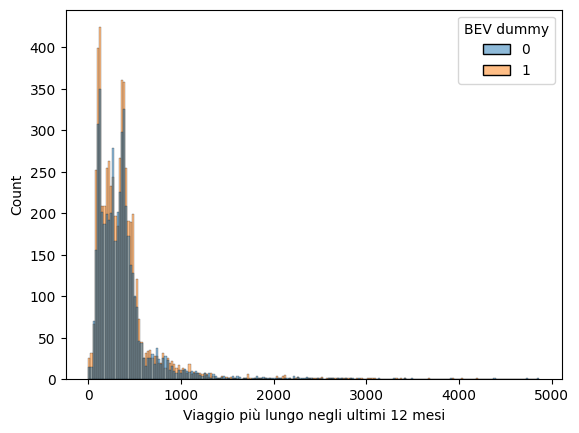

In [ ]:
viaggio_mediano =round(data['Viaggio più lungo negli ultimi 12 mesi'].median(),0)
viaggio_medio = round(data['Viaggio più lungo negli ultimi 12 mesi'].mean(),2)
viaggio_std = round(data['Viaggio più lungo negli ultimi 12 mesi'].std(),2)

print("Il viaggio più lungo medio è di:", viaggio_medio, ", il viaggio più lungo mediano è di:", viaggio_mediano, "e la devianza standard è di:", viaggio_std)
print()
percentili = data['Viaggio più lungo negli ultimi 12 mesi'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Viaggio più lungo negli ultimi 12 mesi", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 175, 350, 550, float('inf')]
labels = ['Viaggio: meno di 175', 'Viaggio: tra 175 e 350', 'Viaggio: tra 350 e 550', 'Viaggio: più di 550']

data_eda_2['Viaggio lungo categoriale'] = pd.cut(data_originale['Viaggio più lungo negli ultimi 12 mesi'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Viaggio lungo categoriale', 'Viaggio più lungo negli ultimi 12 mesi']].head())
#data_eda_2.drop(columns=['Viaggio più lungo negli ultimi 12 mesi'], inplace=True)

  Viaggio lungo categoriale  Viaggio più lungo negli ultimi 12 mesi
0    Viaggio: tra 350 e 550                                  483.14
1       Viaggio: più di 550                                  568.09
2    Viaggio: tra 175 e 350                                  255.16
3    Viaggio: tra 175 e 350                                  312.78
4      Viaggio: meno di 175                                  125.79


In [ ]:
viaggilunghi_counts = data_eda_2['Viaggio lungo categoriale'].value_counts()

print(viaggilunghi_counts)

Viaggio lungo categoriale
Viaggio: tra 350 e 550    3345
Viaggio: tra 175 e 350    3292
Viaggio: meno di 175      2669
Viaggio: più di 550       1382
Name: count, dtype: int64


### Numero viaggi lunghi

0.00     0.0
0.25     0.0
0.50     1.0
0.75     2.0
1.00    65.0
Name: Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi, dtype: float64


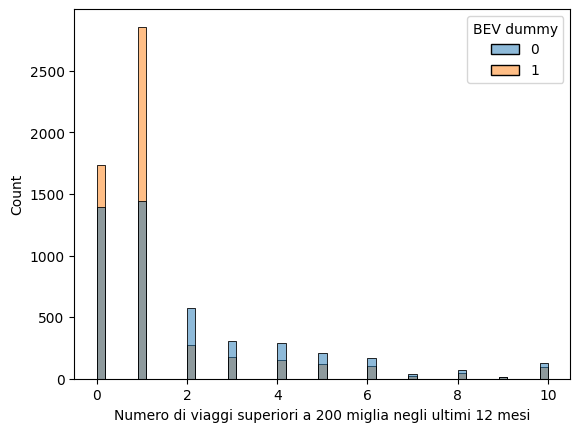

In [ ]:
percentili = data['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)

sns.histplot(data=data[data["Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi"] <= 10],
             x="Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi",
             hue="BEV dummy")
plt.show()

In [ ]:
bins = [0.0, 0.1, 1.1, 2.1, float('inf')]
labels = ['Chi non ne fa viaggi lunghi', 'Un viaggio lungo all anno', '2 viaggi lunghi all anno', '3 o più viaggi lunghi']

data_eda_2["Numero viaggi lunghi all'anno categoriale"] = pd.cut(data_originale['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'], bins=bins, labels=labels, right=False)

print(data_eda_2[["Numero viaggi lunghi all'anno categoriale", 'Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi']].head())
#data_eda_2.drop(columns=['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'], inplace=True)

  Numero viaggi lunghi all'anno categoriale  \
0                 Un viaggio lungo all anno   
1                 Un viaggio lungo all anno   
2                 Un viaggio lungo all anno   
3                 Un viaggio lungo all anno   
4               Chi non ne fa viaggi lunghi   

   Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi  
0                                                  1             
1                                                  1             
2                                                  1             
3                                                  1             
4                                                  0             


In [ ]:
nviaggi_counts = data_eda_2["Numero viaggi lunghi all'anno categoriale"].value_counts()

print(nviaggi_counts)

Numero viaggi lunghi all'anno categoriale
Un viaggio lungo all anno      4299
Chi non ne fa viaggi lunghi    3132
3 o più viaggi lunghi          2413
2 viaggi lunghi all anno        844
Name: count, dtype: int64


### Distanza casa lavoro

0.00      0.00
0.25      6.43
0.50     14.12
0.75     24.52
1.00    488.96
Name: Distanza casa-lavoro, dtype: float64


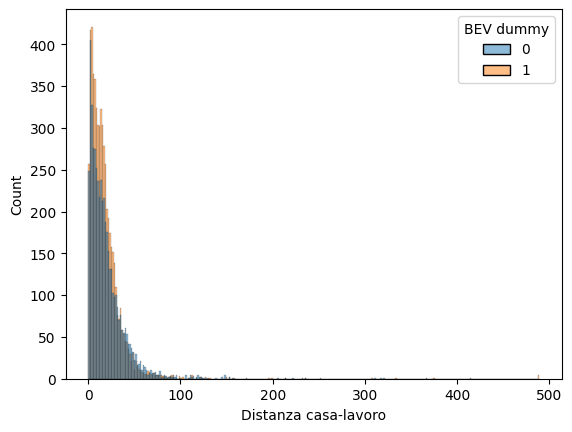

In [ ]:
percentili = data['Distanza casa-lavoro'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
sns.histplot(data=data, x="Distanza casa-lavoro", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0.0, 6.5, 15, 25, 45, float('inf')]
labels = ['Casa-Lavoro: meno di 6,5 miglia', 'Casa-Lavoro: tra 6,5 e 15 miglia', 'Casa-Lavoro: tra 15 e 25 miglia', 'Casa-Lavoro: tra 25 e 45 miglia', 'Casa-Lavoro: più di 45 miglia']

data_eda_2['Distanza casa-lavoro categoriale'] = pd.cut(data_originale['Distanza casa-lavoro'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Distanza casa-lavoro categoriale', 'Distanza casa-lavoro']].head())
#data_eda_2.drop(columns=['Distanza casa-lavoro'], inplace=True)

   Distanza casa-lavoro categoriale  Distanza casa-lavoro
0   Casa-Lavoro: meno di 6,5 miglia                  0.01
1  Casa-Lavoro: tra 6,5 e 15 miglia                 10.69
2   Casa-Lavoro: tra 15 e 25 miglia                 17.63
3   Casa-Lavoro: meno di 6,5 miglia                  3.53
4   Casa-Lavoro: tra 25 e 45 miglia                 28.05


In [ ]:
dist_counts = data_eda_2['Distanza casa-lavoro categoriale'].value_counts()

print(dist_counts)

Distanza casa-lavoro categoriale
Casa-Lavoro: tra 6,5 e 15 miglia    2938
Casa-Lavoro: meno di 6,5 miglia     2697
Casa-Lavoro: tra 15 e 25 miglia     2454
Casa-Lavoro: tra 25 e 45 miglia     1933
Casa-Lavoro: più di 45 miglia        666
Name: count, dtype: int64


### Emissioni

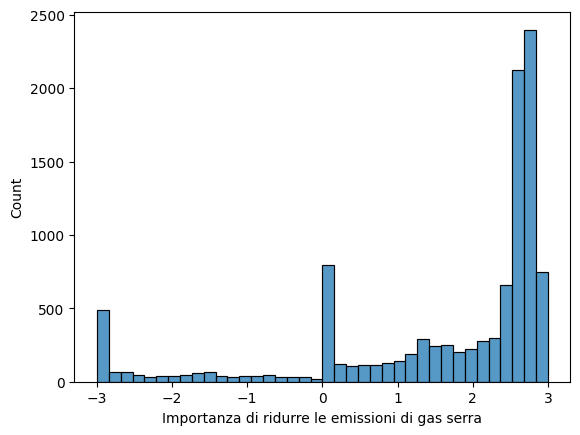

In [ ]:
sns.histplot(data=data, x="Importanza di ridurre le emissioni di gas serra")
plt.show()

In [ ]:
emiss_1 = -3
emiss_2 = -1.5
emiss_3 = 0
emiss_4= 1.5
emiss_5 = 3

punto1_emi = emiss_1
punto2_emi = (emiss_2 - emiss_1)/2+emiss_1
punto3_emi = (emiss_3 - emiss_2)/2+emiss_2
punto4_emi = (emiss_4 - emiss_3)/2+emiss_3
punto5_emi = (emiss_5 - emiss_4)/2+emiss_4
punto6_emi = emiss_5

Classe_emi_1 = [punto1_emi, punto2_emi]
Classe_emi_2 = [punto2_emi, punto3_emi]
Classe_emi_3 = [punto3_emi, punto4_emi]
Classe_emi_4 = [punto4_emi, punto5_emi]
Classe_emi_5 = [punto5_emi, punto6_emi]

print("importanza per le emissioni: molto basso:", [round(x,2) for x in Classe_emi_1])
print("importanza per le emissioni: basso:", [round(x,2) for x in Classe_emi_2])
print("importanza per le emissioni: medio:", [round(x,2) for x in Classe_emi_3])
print("importanza per le emissioni: alto:", [round(x,2) for x in Classe_emi_4])
print("importanza per le emissioni: molto alto:", [round(x,2) for x in Classe_emi_5])

importanza per le emissioni: molto basso: [-3, -2.25]
importanza per le emissioni: basso: [-2.25, -0.75]
importanza per le emissioni: medio: [-0.75, 0.75]
importanza per le emissioni: alto: [0.75, 2.25]
importanza per le emissioni: molto alto: [2.25, 3]


In [ ]:
bins = [punto1_emi, punto2_emi, punto3_emi, punto4_emi, punto5_emi, float('inf')]
labels = ['Molto basso', 'Basso', 'Medio', 'Alto', 'Molto alto']

data_eda_2['Sensibilità ambientale categoriale'] = pd.cut(data_originale['Importanza di ridurre le emissioni di gas serra'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Importanza di ridurre le emissioni di gas serra', 'Sensibilità ambientale categoriale']].head())
#data_eda_2.drop(columns=['Importanza di ridurre le emissioni di gas serra'], inplace=True)

   Importanza di ridurre le emissioni di gas serra  \
0                                             2.52   
1                                             2.76   
2                                             2.60   
3                                             1.23   
4                                             1.08   

  Sensibilità ambientale categoriale  
0                         Molto alto  
1                         Molto alto  
2                         Molto alto  
3                               Alto  
4                               Alto  


In [ ]:
emi_counts = data_eda_2['Sensibilità ambientale categoriale'].value_counts()

print(emi_counts)

Sensibilità ambientale categoriale
Molto alto     6187
Alto           2019
Medio          1380
Molto basso     689
Basso           413
Name: count, dtype: int64


### BEV Dummy

In [ ]:
data_eda_2['BEV dummy'] = data_originale['BEV dummy'].replace({0: 'No', 1: 'Si'})


### Età - standby

In [ ]:
#data_eda_2["Classe d'età"] = data_originale["Classe d'età"].replace({0: 'Giovani', 1: 'Giovani adulti'})
#bins = [0, 25, 45, 65, float('inf')]
#labels = ['Giovani', 'Giovani Adulti', 'Adulti', 'Adulti avanzati']

#data_new['Età categoriale'] = pd.cut(data_orgiginale['Età'], bins=bins, labels=labels, right=False)

#print(data_new[['Età', 'Età categoriale']].head())
#data_new.drop(columns=['Età'], inplace=True)

## Resoconto

In [ ]:
data_eda_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Genere                                                        10688 non-null  object  
 1   Classe d'età                                                  10688 non-null  object  
 2   Reddito familiare                                             10688 non-null  int64   
 3   Classe Reddito Familiare                                      10688 non-null  object  
 4   Livello di istruzione                                         10688 non-null  object  
 5   Casa di proprietà                                             10688 non-null  object  
 6   Casa Indipendente                                             10688 non-null  object  
 7   Numero persone in famiglia                                

In [ ]:
data_eda_2 = data_eda_2.drop(columns=['Reddito familiare'], errors='ignore')
data_eda_2.head()

,Genere,Classe d'età,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Tipologia di auto precedente,Auto attuale,Tipologia di auto attuale,BEV dummy,"Numero persone in famiglia, categoriale","Numero di auto in famiglia, categoriale",VMT Categoriale,Viaggio lungo,Numero viaggi lunghi allanno,Distanza casa-lavoro cat,"Importanza di ridurre le emissioni di gas serra, Categoriale"
0,Maschio,65-74,Molto alta,Laurea 1L,Si,Si,PHEV,Toyota Mirai FCEV,FCEV,No,Coppie,Due Auto,VMT Alto,Viaggio: tra 350 e 550,Un viaggio lungo all anno,"Casa-Lavoro: meno di 6,5 miglia",Molto alto
1,Maschio,65-74,Molto alta,Laurea 2L o Dottorato,Si,Si,HEV,Toyota Mirai FCEV,FCEV,No,Famiglie con 1 figlio,Tre Auto,VMT Basso,Viaggio: più di 500,Un viaggio lungo all anno,"Casa-Lavoro: tra 6,5 e 15",Molto alto
2,Maschio,55-64,Media,Diploma o Qualifica professionale,Si,Si,PHEV,Toyota Mirai FCEV,FCEV,No,Coppie,Tre Auto,VMT Basso,Viaggio: tra 175 e 350,Un viaggio lungo all anno,Casa-Lavoro: tra 15 e 25 miglia,Molto alto
3,Maschio,75-79,Alta,Laurea 2L o Dottorato,Si,Si,HEV,Toyota Mirai FCEV,FCEV,No,Coppie,Due Auto,VMT Medio,Viaggio: tra 175 e 350,Un viaggio lungo all anno,"Casa-Lavoro: meno di 6,5 miglia",Alto
4,Maschio,45-54,Estremamente alta,Diploma o Qualifica professionale,Si,Si,HEV,Toyota Mirai FCEV,FCEV,No,Famiglie con 1 figlio,Tre Auto,VMT Alto,Viaggio: meno di 175,Chi non ne fa viaggi lunghi,tCasa-Lavoro: ra 25 e 45 miglia,Alto


In [ ]:
print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa Indipendente'], data_eda_2['BEV dummy']))
print(pd.crosstab(data_eda_1['Casa di proprietà'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa di proprietà'], data_eda_2['BEV dummy']))


BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy            No    Si
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy           0.0   1.0
Casa di proprietà            
No                  761   676
Si                 4131  5120
BEV dummy            No    Si
Casa di proprietà            
No                  761   676
Si                 4131  5120


In [ ]:
data_eda_2.to_csv('data_eda_2.csv', encoding = 'utf-8-sig')
files.download('data_eda_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(", ".join([f'"{col}"' for col in data_eda_2.columns]))

"Genere", "Classe d'età", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Tipologia di auto precedente", "Auto attuale", "Tipologia di auto attuale", "BEV dummy", "Numero persone in famiglia, categoriale", "Numero di auto in famiglia, categoriale", "VMT Categoriale", "Viaggio lungo", "Numero viaggi lunghi allanno", "Distanza casa-lavoro cat", "Importanza di ridurre le emissioni di gas serra, Categoriale"


# 7. MCA

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import prince

ModuleNotFoundError: No module named 'prince'

In [ ]:
mca_cols = data_orgiginale.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

0 features used for MCA are []


In [ ]:
data_new2 =data_new.drop(columns=['Reddito familiare'])

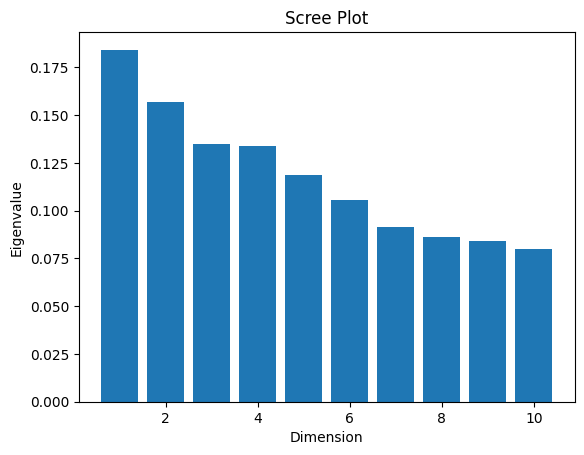

In [ ]:
mca = prince.MCA(n_components=10, random_state=42)
mca_fit = mca.fit(data_new2)

# Get the explained inertia for each dimension
eigenvalues = mca_fit.eigenvalues_

# Create a scree plot
plt.bar(range(1, 11), eigenvalues)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


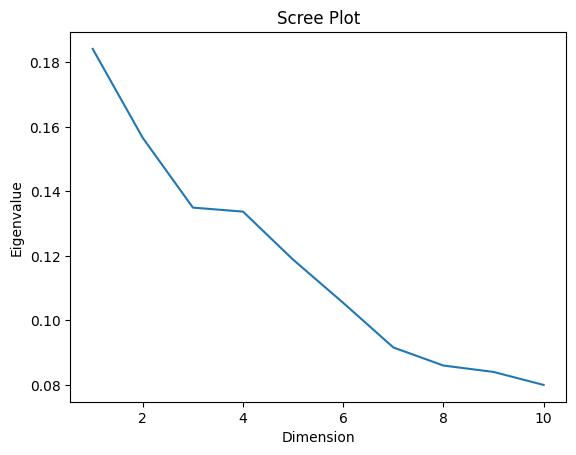

In [ ]:
plt.plot(range(1, 11), eigenvalues)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

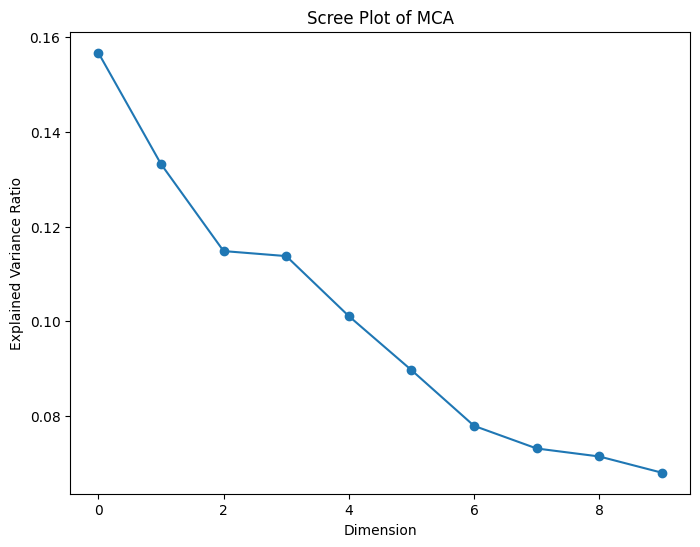

In [ ]:
mca_b = prince.MCA(n_components=None, random_state=42)
mca_fitted = mca.fit(data_new2)

# Create a scree plot
plt.figure(figsize=(15, 6))
plt.plot(mca_fitted.eigenvalues_ / mca_fitted.eigenvalues_.sum(), marker='o')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of MCA')
plt.show()

In [ ]:
# Perform MCA with 2 dimensions
mca_2 = prince.MCA(n_components=2, random_state=42)
mca_fit_2 = mca_2.fit(data_new2)

# Get the row and column coordinates
row_coords = mca_fit_2.row_coordinates(data_new2)
col_coords = mca_fit_2.column_coordinates(data_new2)

In [ ]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.184,3.68%,3.68%
1,0.157,3.13%,6.82%
2,0.135,2.70%,9.51%
3,0.134,2.67%,12.19%
4,0.119,2.38%,14.57%
5,0.105,2.11%,16.68%
6,0.092,1.83%,18.51%
7,0.086,1.72%,20.23%
8,0.084,1.68%,21.91%


In [ ]:
mca_2.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.184,3.68%,3.68%
1,0.157,3.13%,6.82%


## per multicollinearità

In [ ]:
data_new3 = data_new[['Casa Indipendente', 'Casa di proprietà', 'Numero di auto in famiglia, categoriale', 'Numero persone in famiglia, categoriale']]
data_new3.head()

,Casa Indipendente,Casa di proprietà,"Numero di auto in famiglia, categoriale","Numero persone in famiglia, categoriale"
0,Si,Si,Due Auto,Coppie
1,Si,Si,Tre Auto,Famiglie con 1 figlio
2,Si,Si,Tre Auto,Coppie
3,Si,Si,Due Auto,Coppie
4,Si,Si,Tre Auto,Famiglie con 1 figlio


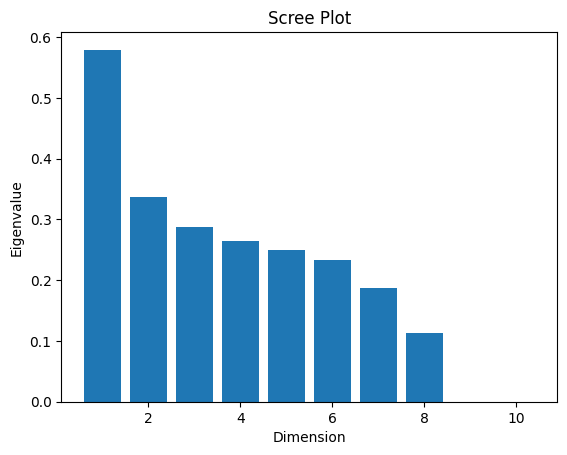

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.579,25.75%,25.75%
1,0.336,14.94%,40.69%
2,0.287,12.76%,53.45%
3,0.264,11.73%,65.18%
4,0.249,11.08%,76.26%
5,0.233,10.36%,86.62%
6,0.188,8.34%,94.96%
7,0.113,5.04%,100.00%
8,0.000,0.00%,100.00%


In [ ]:
mca2 = prince.MCA(n_components=10, random_state=42)
mca_fit2 = mca2.fit(data_new3)

# Get the explained inertia for each dimension
eigenvalues2 = mca_fit2.eigenvalues_

# Create a scree plot
plt.bar(range(1, 11), eigenvalues2)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

mca2.eigenvalues_summary

In [ ]:
# Select 2 components
mca_2d = mca_fit2.transform(data_new3).iloc[:, :2]
# Print the 2 components
print(mca_2d)

              0         1
0     -0.161730 -0.381983
1     -0.455957  0.048008
2     -0.343574 -0.128837
3     -0.161730 -0.381983
4     -0.455957  0.048008
...         ...       ...
10690 -0.418140  0.103306
10691 -0.161730 -0.381983
10692  0.840713  2.099221
10693 -0.338916 -0.151385
10694 -0.595326  0.333905

[10624 rows x 2 columns]


In [ ]:
#from google.colab import files
#data_new3.to_csv('data_new3.csv', index=False)
#files.download('data_new3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8. Cluster

In [ ]:
!pip install kmodes

from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class


%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## Preparazione cluster

In [ ]:
data_BEV_2 = data_eda_2[data_eda_2['BEV dummy'] == 'Si']
data_BEV_2.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)
data_BEV_2.head()

<ipython-input-51-e798a1f22bf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_2.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)


,Genere,Classe d'età,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Tipologia di auto precedente,"Numero persone in famiglia, categoriale","Numero di auto in famiglia, categoriale",VMT Categoriale,Viaggio lungo,Numero viaggi lunghi allanno,Distanza casa-lavoro cat,"Importanza di ridurre le emissioni di gas serra, Categoriale"
284,Maschio,65-74,Estremamente alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Tre Auto,Basso,tra 175 e 350,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto alto
286,Maschio,55-64,Media,Laurea 1L,Si,Si,ICE,Coppie,Tre Auto,Medio,più di 500,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto basso
287,Maschio,75-79,Molto alta,Laurea 2L o Dottorato,Si,Si,ICE,Famiglie con 1 figlio,Più di quattro Auto,Basso,più di 500,Un viaggio lungo all anno,"tra 6,5 e 15",Molto alto
289,Maschio,55-64,Alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Due Auto,Basso,meno di 175,Chi non ne fa,"meno di 6,5 miglia",Alto
290,Maschio,45-54,Molto alta,Laurea 1L,Si,Si,ICE,Famiglie con 3 o più di 3 figli,Due Auto,Alto,tra 350 e 550,Un viaggio lungo all anno,tra 25 e 45 miglia,Molto alto


In [ ]:
data_BEV = data_eda_2[data_eda_2['BEV dummy'] == 'Si']
data_BEV.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)
data_BEV.head()

<ipython-input-52-1a7ca03d273d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)


,Genere,Classe d'età,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Tipologia di auto precedente,"Numero persone in famiglia, categoriale","Numero di auto in famiglia, categoriale",VMT Categoriale,Viaggio lungo,Numero viaggi lunghi allanno,Distanza casa-lavoro cat,"Importanza di ridurre le emissioni di gas serra, Categoriale"
284,Maschio,65-74,Estremamente alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Tre Auto,Basso,tra 175 e 350,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto alto
286,Maschio,55-64,Media,Laurea 1L,Si,Si,ICE,Coppie,Tre Auto,Medio,più di 500,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto basso
287,Maschio,75-79,Molto alta,Laurea 2L o Dottorato,Si,Si,ICE,Famiglie con 1 figlio,Più di quattro Auto,Basso,più di 500,Un viaggio lungo all anno,"tra 6,5 e 15",Molto alto
289,Maschio,55-64,Alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Due Auto,Basso,meno di 175,Chi non ne fa,"meno di 6,5 miglia",Alto
290,Maschio,45-54,Molto alta,Laurea 1L,Si,Si,ICE,Famiglie con 3 o più di 3 figli,Due Auto,Alto,tra 350 e 550,Un viaggio lungo all anno,tra 25 e 45 miglia,Molto alto


In [ ]:
from google.colab import files
data_BEV.to_csv('data_BEV.csv', encoding = 'utf-8-sig')
files.download('data_BEV.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score


categorical_features = data_BEV_2.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for feature in categorical_features:
    if pd.api.types.is_numeric_dtype(data_BEV_2[feature]):
        continue

    data_BEV_2[feature] = le.fit_transform(data_BEV_2[feature].astype(str)) # Convert to string to handle mixed types


n_clusters_range = range(2, 11)
silhouette_scores = []
inertia_values = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_BEV_2) # data_BEV should now contain only numerical data
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_BEV_2, labels)
    inertia = kmeans.inertia_
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)

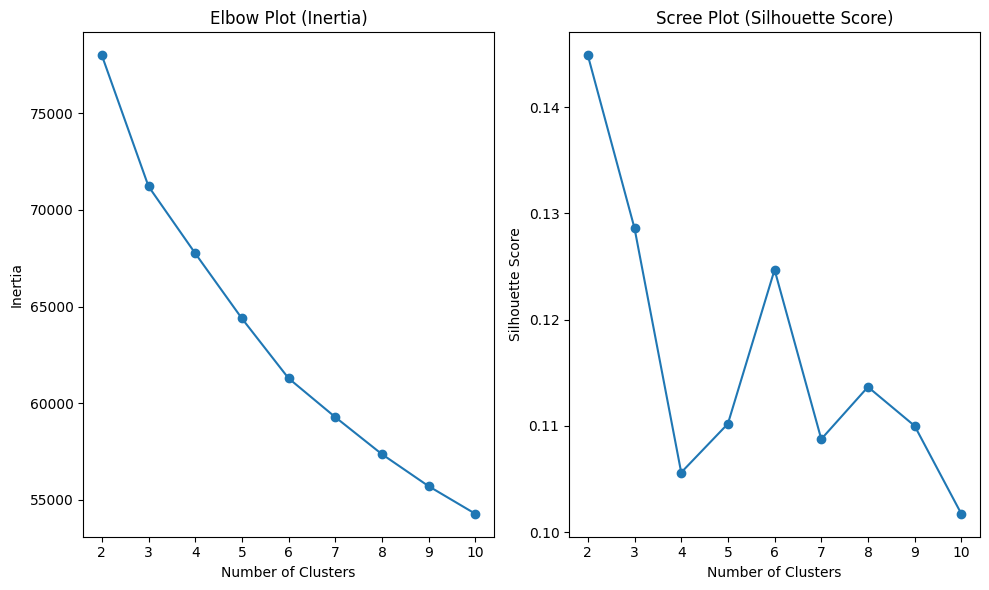

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot (Inertia)')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Scree Plot (Silhouette Score)')

plt.tight_layout()
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 141079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 141079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 141079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 141079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 141079.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3494, cost: 133215.0
Run 1, iteration: 2/100, moves: 658, cost: 133214.0
Run 1, iteration: 3/100, moves: 0, cost: 133214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iterat

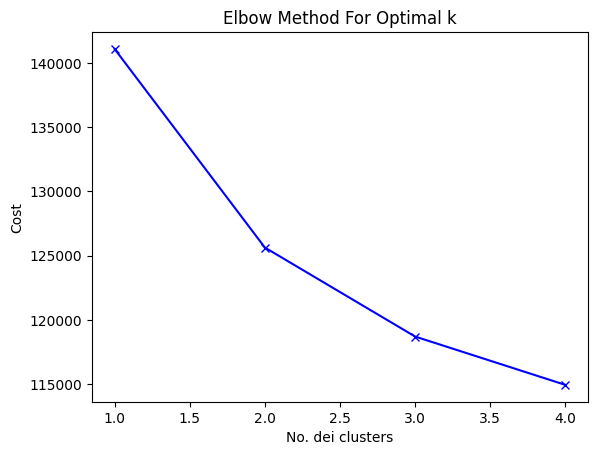

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. dei clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## 3 Cluster

In [ ]:
kmode = KModes(n_clusters=3, init = "random", n_init = 20, verbose=1)
clusters = kmode.fit_predict(data_BEV_2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1811, cost: 33117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1271, cost: 35311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2470, cost: 34381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2016, cost: 33986.0
Run 4, iteration: 2/100, moves: 386, cost: 33986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1086, cost: 34294.0
Run 5, iteration: 2/100, moves: 312, cost: 34085.0
Run 5, iteration: 3/100, moves: 12, cost: 34085.0
Best run was number 1


array([1, 0, 1, ..., 2, 0, 2], dtype=uint16)

In [ ]:
data_BEV.insert(0, "Cluster", clusters, True)

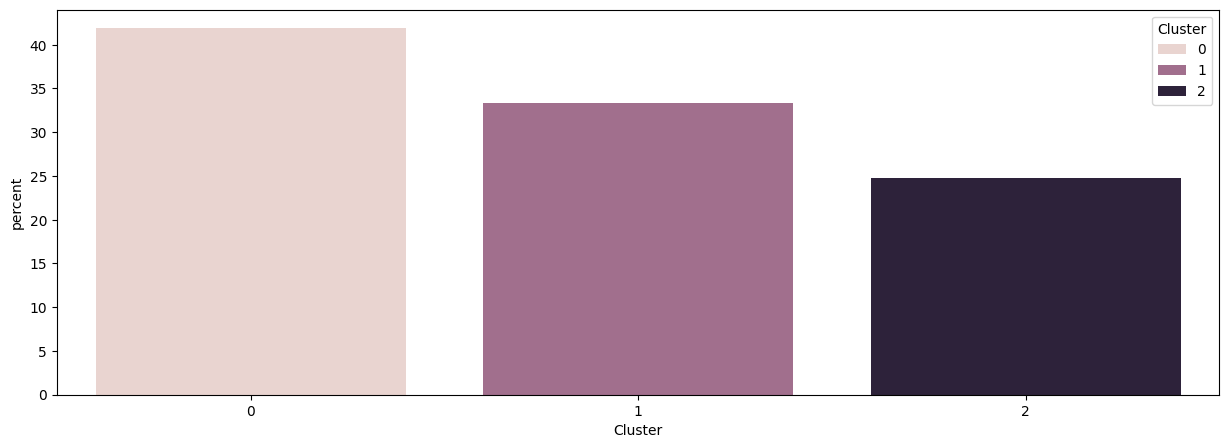

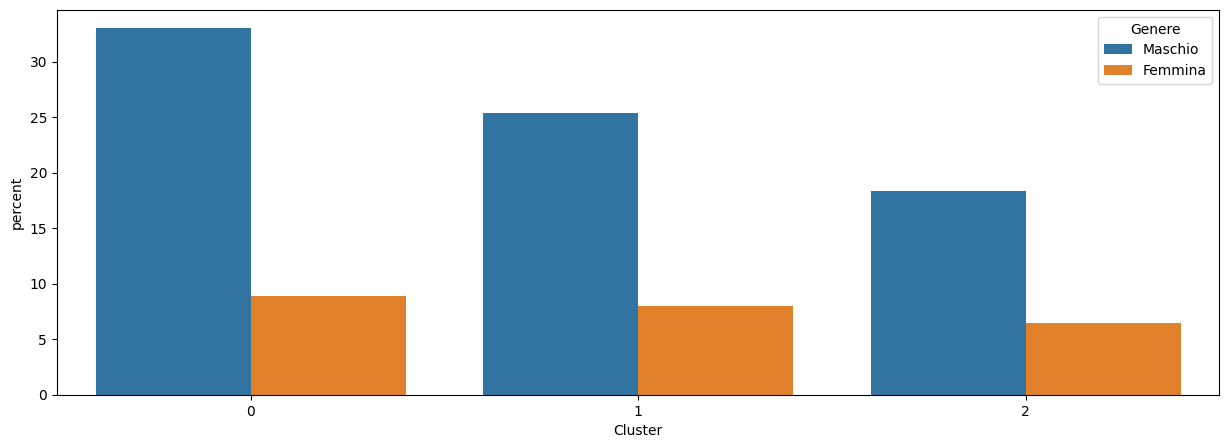

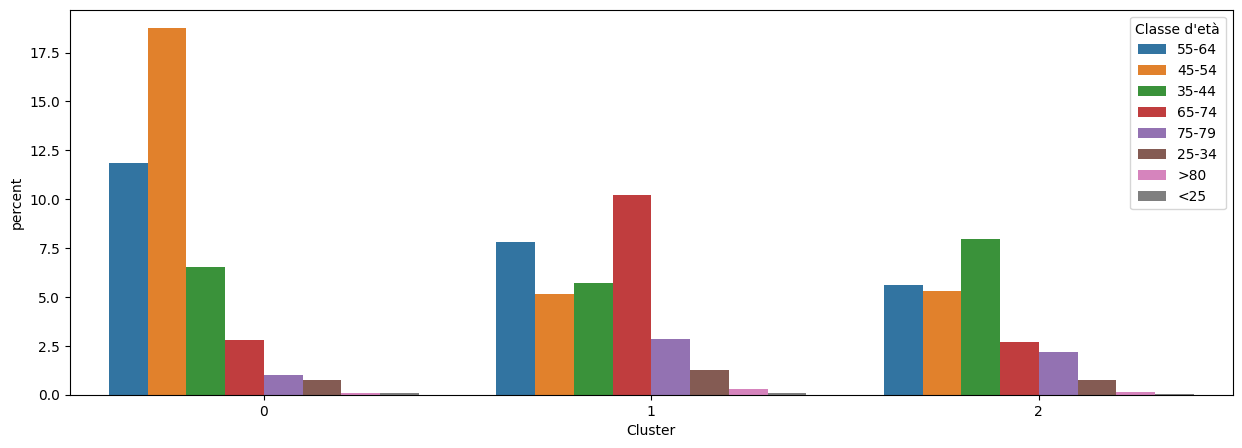

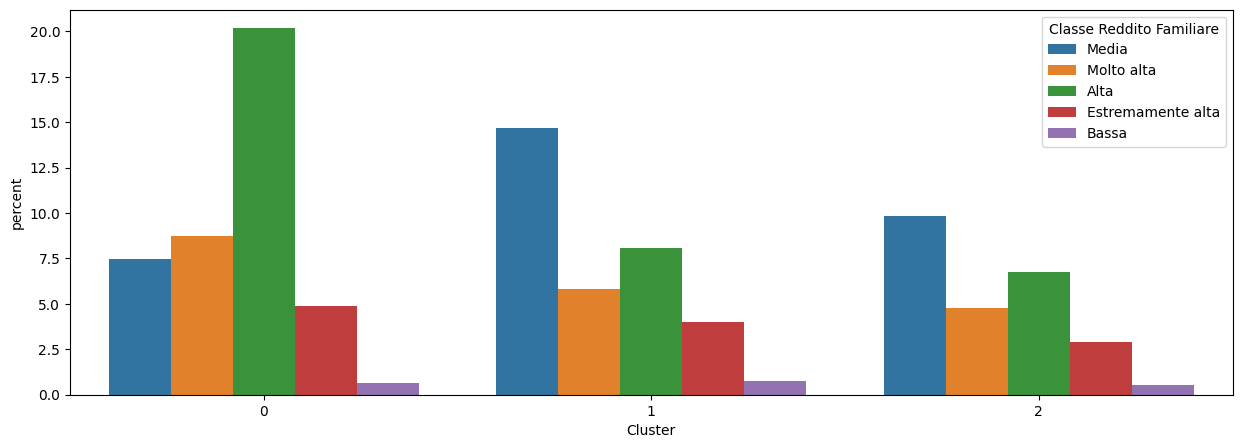

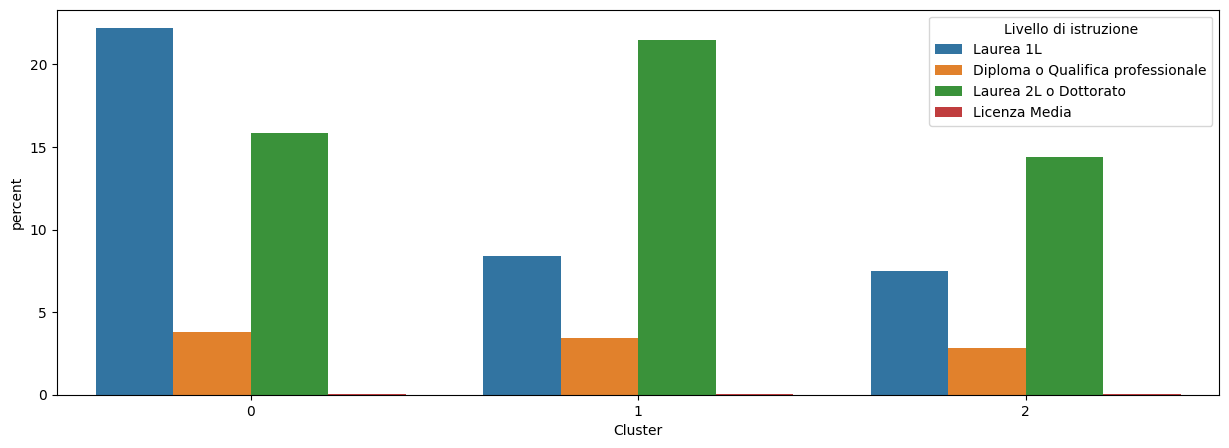

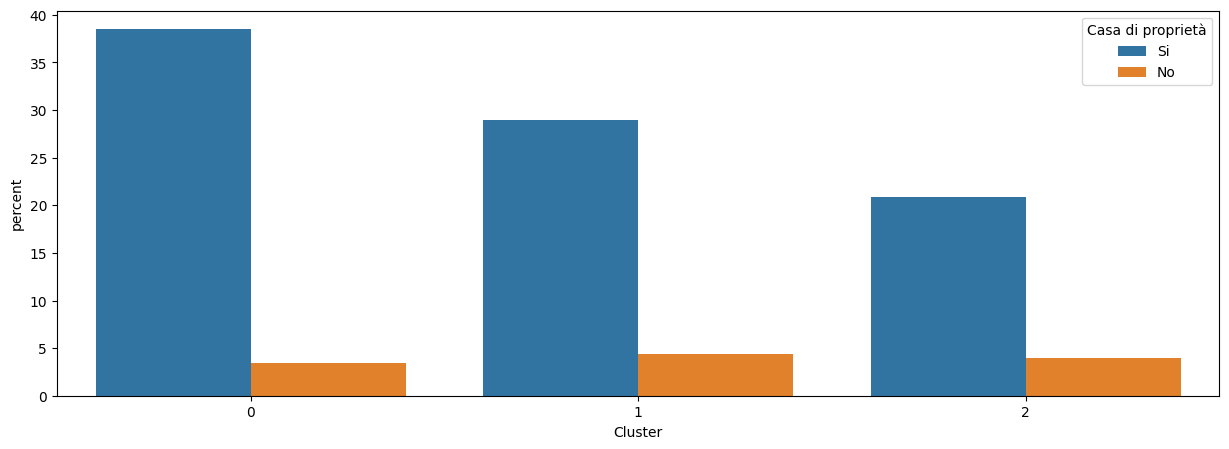

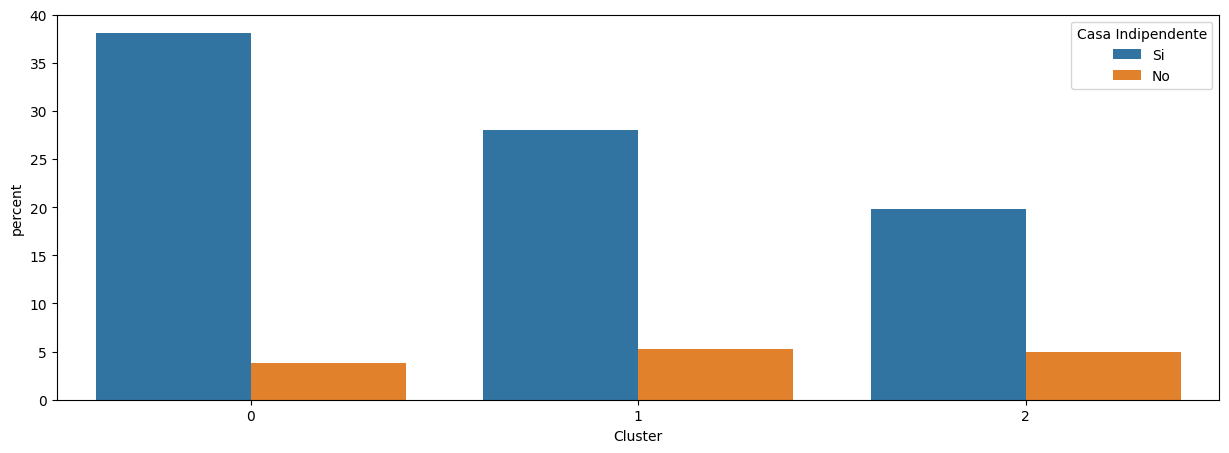

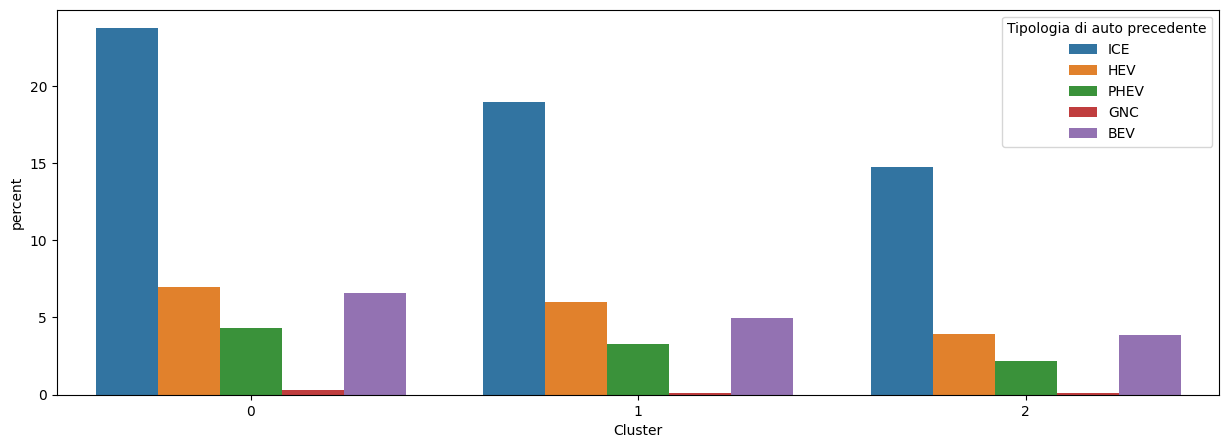

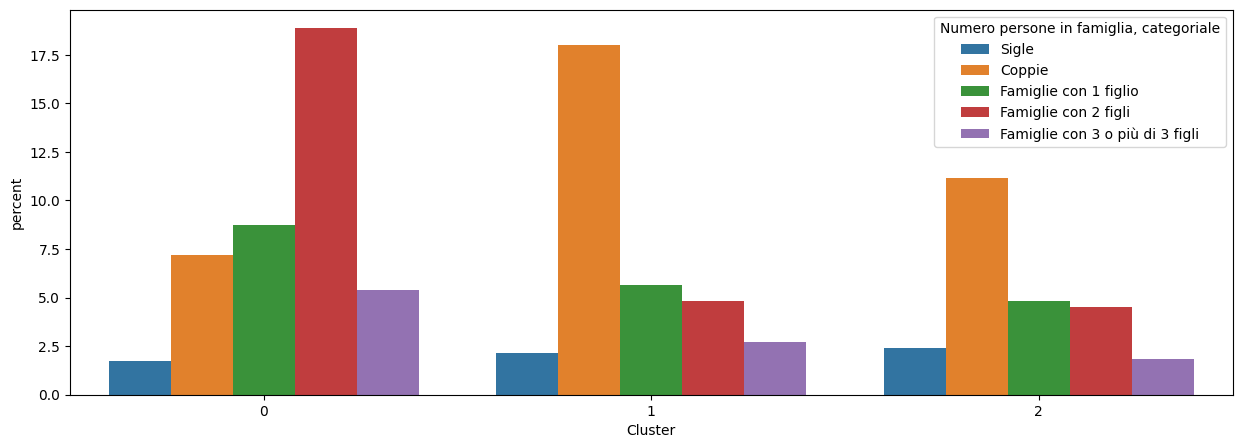

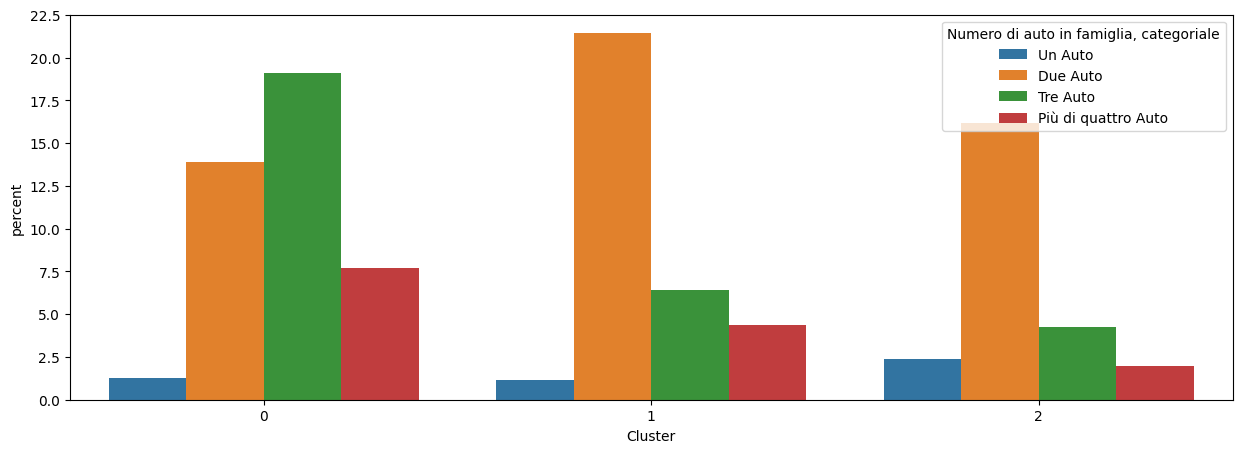

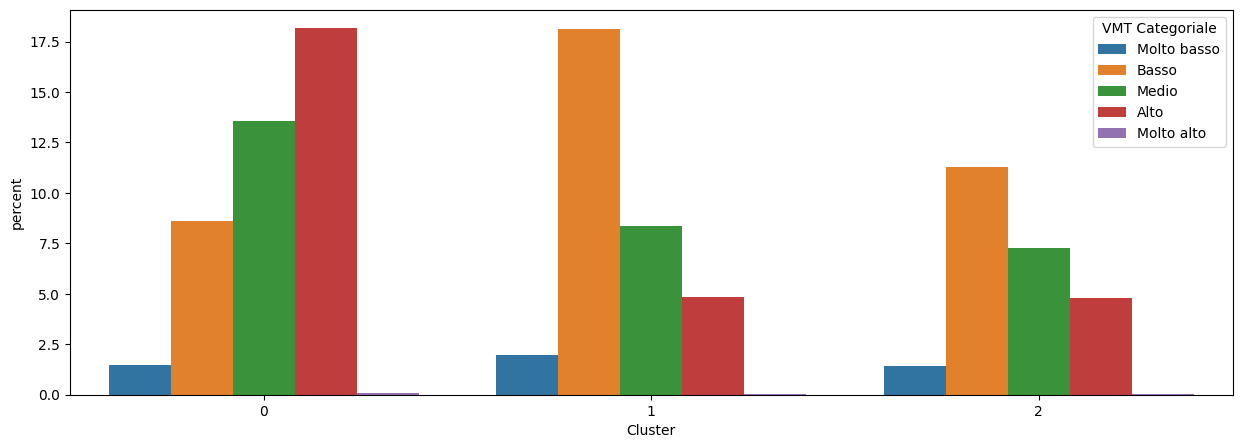

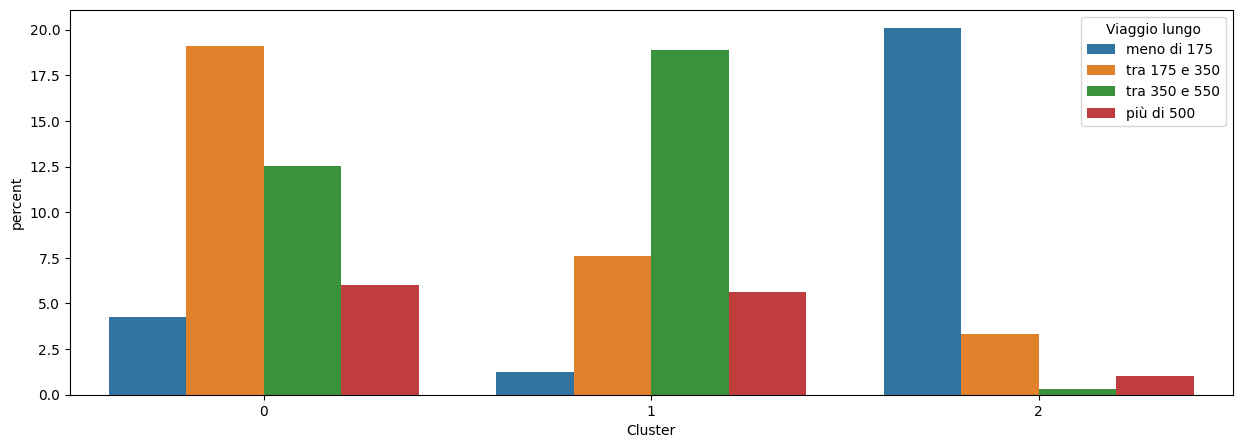

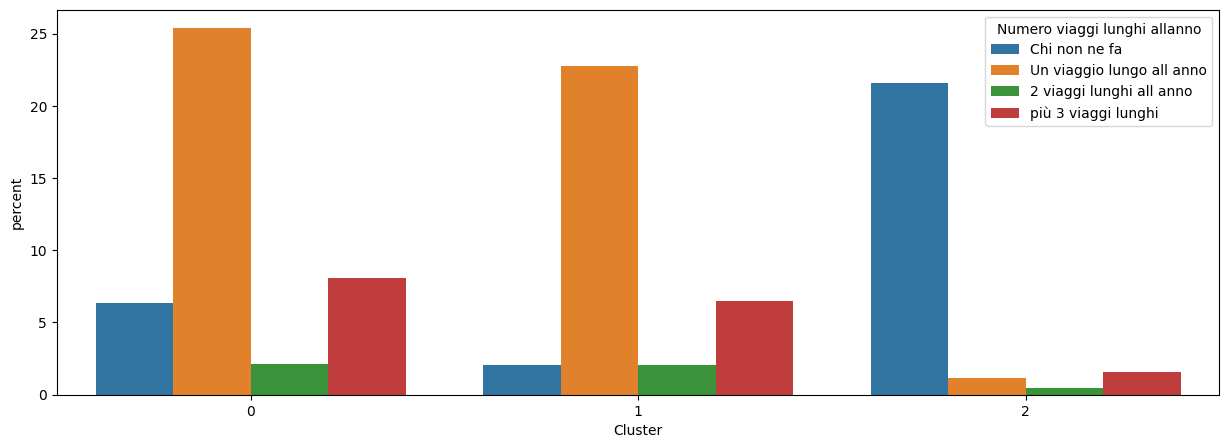

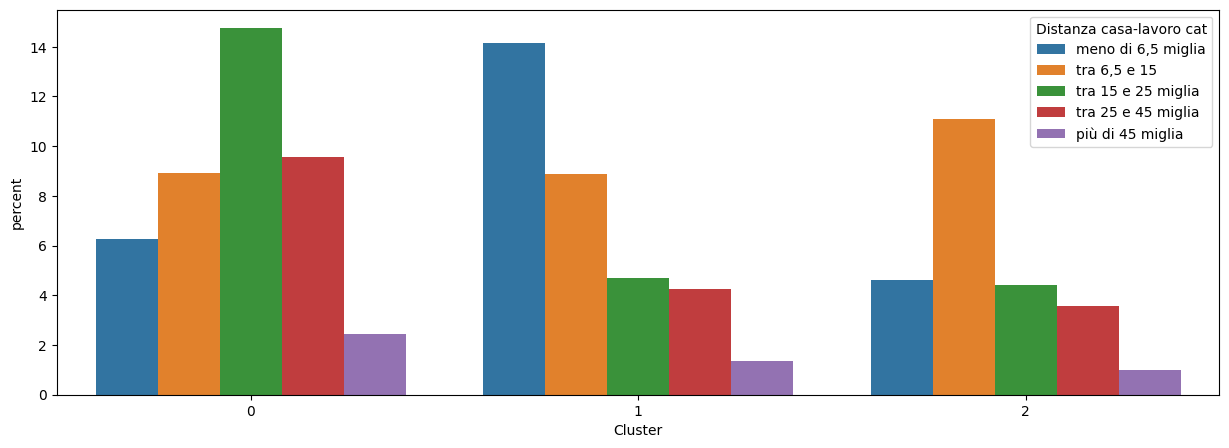

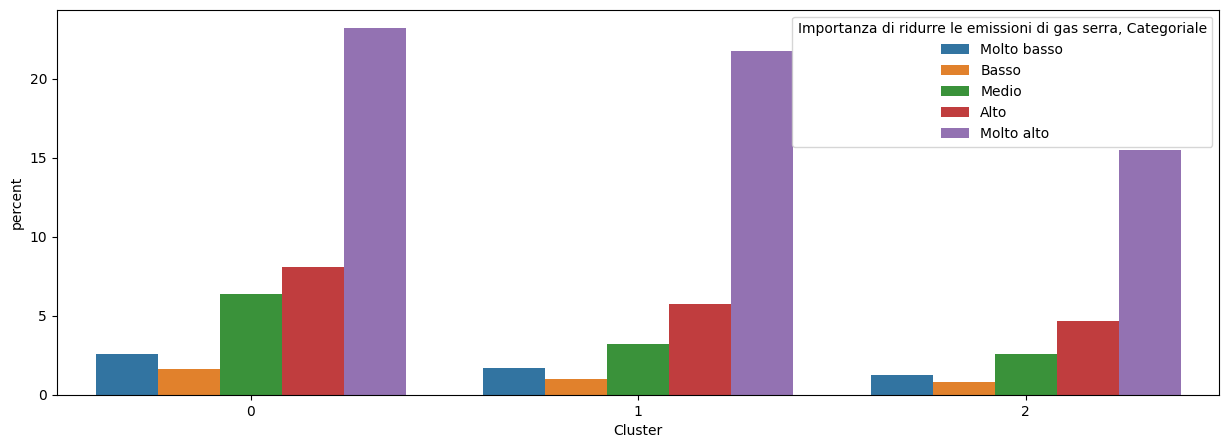

In [ ]:
all_features = data_BEV.columns.tolist()

#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]

for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_BEV, stat="percent")
    plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(data_BEV_2, method='ward')

# Create a dendrogram
plt.figure(figsize=(20, 12))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

# Add a title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Show the plot
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [72.5, 72.5, 111.25, 111.25],
  [25.0, 25.0, 91.875, 91.875],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [150.0, 150.0, 187.5, 187.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [233.75, 233.75, 281.25, 281.25],
  [168.75, 168.75, 257.5, 257.5],
  [58.4375, 58.4375, 213.125, 213.125],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0,

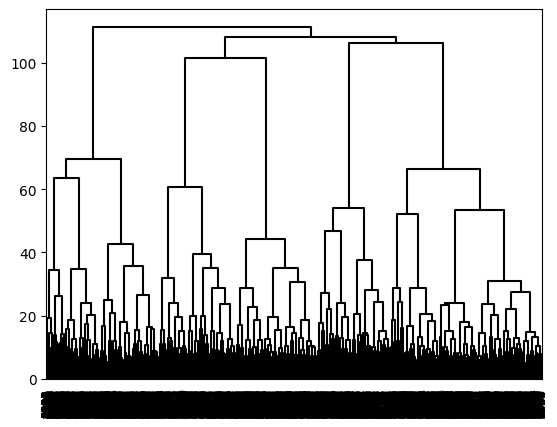

In [ ]:
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=0.5, above_threshold_color='k', count_sort=True)
#plt.savefig('dendrogram.png', dpi=300)

## 4 cluster

In [ ]:
kmode2 = KModes(n_clusters=4, init = "random", n_init = 20, verbose=1)
clusters2 = kmode2.fit_predict(data_BEV_2)
clusters2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2514, cost: 32043.0
Run 1, iteration: 2/100, moves: 1331, cost: 32043.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1481, cost: 33146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1055, cost: 34383.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2475, cost: 32912.0
Run 4, iteration: 2/100, moves: 104, cost: 32912.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1709, cost: 32929.0
Best run was number 1


array([0, 0, 0, ..., 2, 0, 2], dtype=uint16)

In [ ]:
data_BEV.head()

,Cluster,Genere,Classe d'età,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Tipologia di auto precedente,"Numero persone in famiglia, categoriale","Numero di auto in famiglia, categoriale",VMT Categoriale,Viaggio lungo,Numero viaggi lunghi allanno,Distanza casa-lavoro cat,"Importanza di ridurre le emissioni di gas serra, Categoriale"
284,1,Maschio,65-74,Estremamente alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Tre Auto,Basso,tra 175 e 350,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto alto
286,0,Maschio,55-64,Media,Laurea 1L,Si,Si,ICE,Coppie,Tre Auto,Medio,più di 500,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto basso
287,1,Maschio,75-79,Molto alta,Laurea 2L o Dottorato,Si,Si,ICE,Famiglie con 1 figlio,Più di quattro Auto,Basso,più di 500,Un viaggio lungo all anno,"tra 6,5 e 15",Molto alto
289,2,Maschio,55-64,Alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Due Auto,Basso,meno di 175,Chi non ne fa,"meno di 6,5 miglia",Alto
290,0,Maschio,45-54,Molto alta,Laurea 1L,Si,Si,ICE,Famiglie con 3 o più di 3 figli,Due Auto,Alto,tra 350 e 550,Un viaggio lungo all anno,tra 25 e 45 miglia,Molto alto


In [ ]:
data_BEV.drop(columns=['Cluster'], inplace=True)
cluster2 = data_BEV.insert(0, "Cluster2", clusters2, True)
data_BEV.head()

<ipython-input-65-dc443d882e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV.drop(columns=['Cluster'], inplace=True)


,Cluster2,Genere,Classe d'età,Classe Reddito Familiare,Livello di istruzione,Casa di proprietà,Casa Indipendente,Tipologia di auto precedente,"Numero persone in famiglia, categoriale","Numero di auto in famiglia, categoriale",VMT Categoriale,Viaggio lungo,Numero viaggi lunghi allanno,Distanza casa-lavoro cat,"Importanza di ridurre le emissioni di gas serra, Categoriale"
284,0,Maschio,65-74,Estremamente alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Tre Auto,Basso,tra 175 e 350,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto alto
286,0,Maschio,55-64,Media,Laurea 1L,Si,Si,ICE,Coppie,Tre Auto,Medio,più di 500,Un viaggio lungo all anno,tra 15 e 25 miglia,Molto basso
287,0,Maschio,75-79,Molto alta,Laurea 2L o Dottorato,Si,Si,ICE,Famiglie con 1 figlio,Più di quattro Auto,Basso,più di 500,Un viaggio lungo all anno,"tra 6,5 e 15",Molto alto
289,2,Maschio,55-64,Alta,Laurea 2L o Dottorato,Si,Si,HEV,Coppie,Due Auto,Basso,meno di 175,Chi non ne fa,"meno di 6,5 miglia",Alto
290,1,Maschio,45-54,Molto alta,Laurea 1L,Si,Si,ICE,Famiglie con 3 o più di 3 figli,Due Auto,Alto,tra 350 e 550,Un viaggio lungo all anno,tra 25 e 45 miglia,Molto alto


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_BEV)

MessageError: Error: credential propagation was unsuccessful

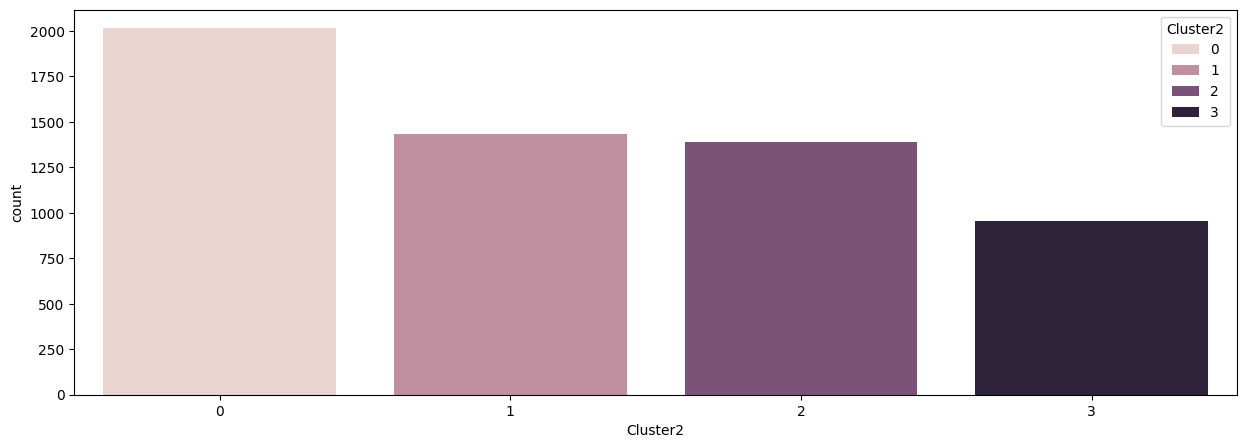

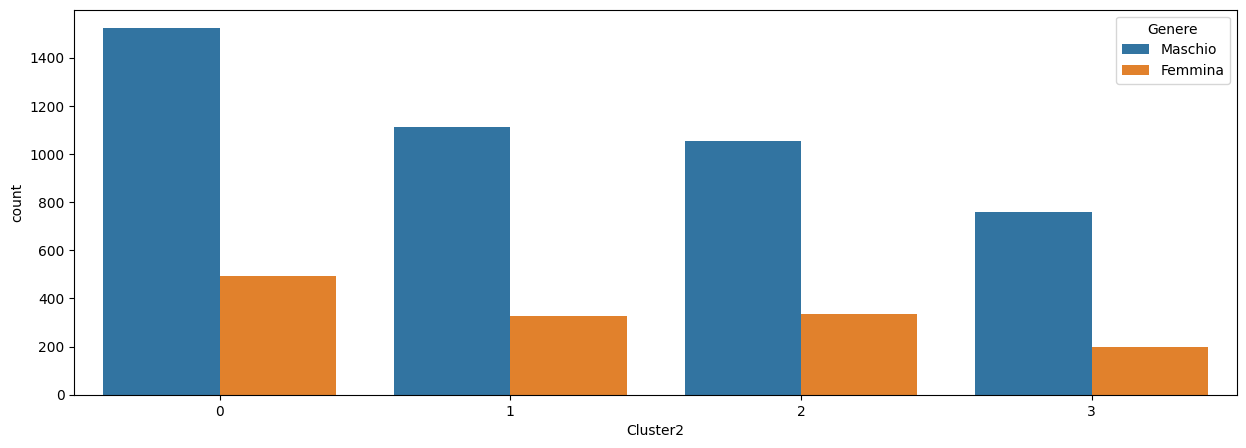

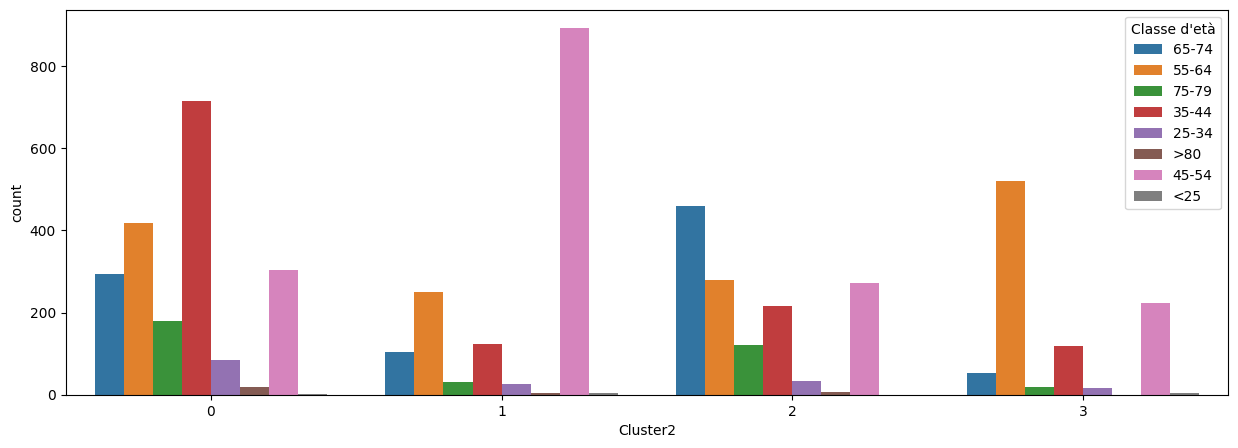

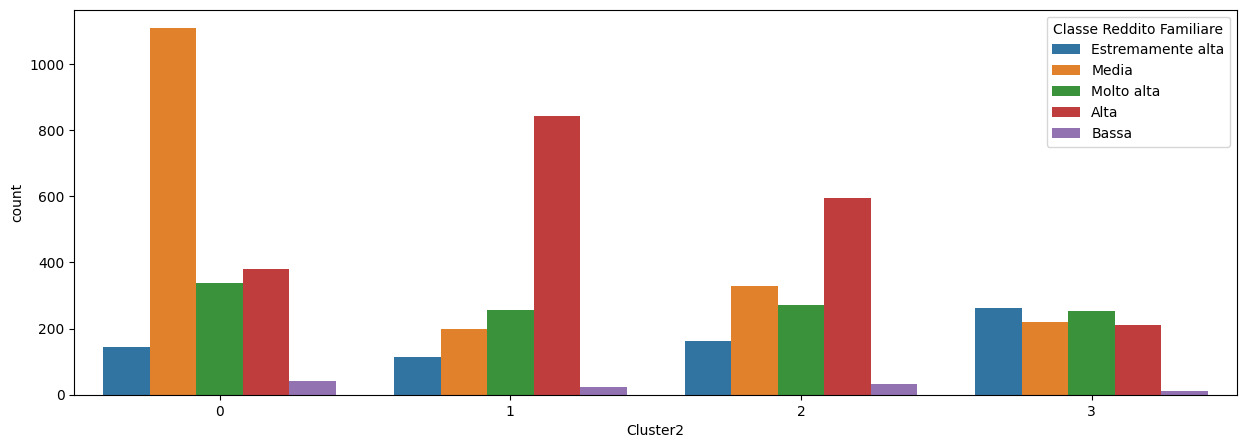

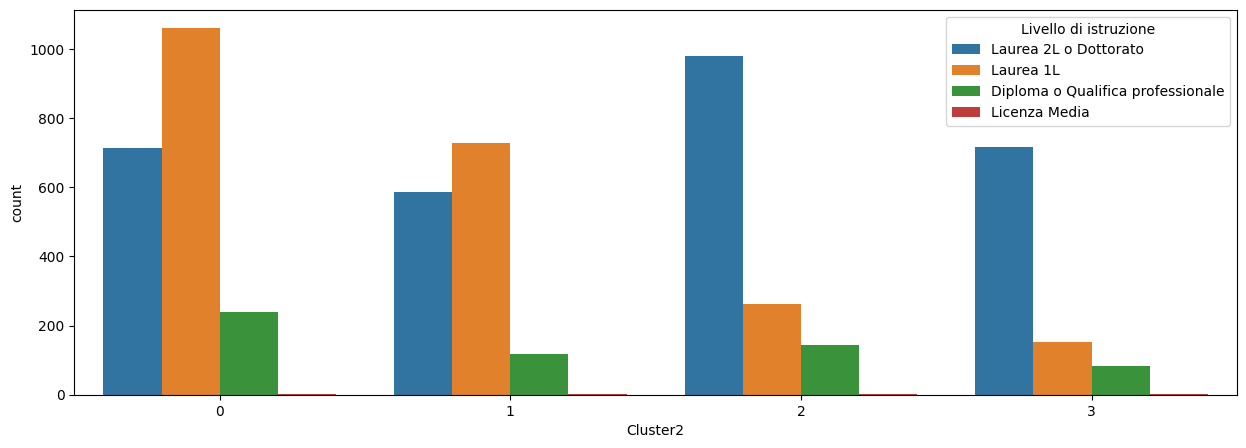

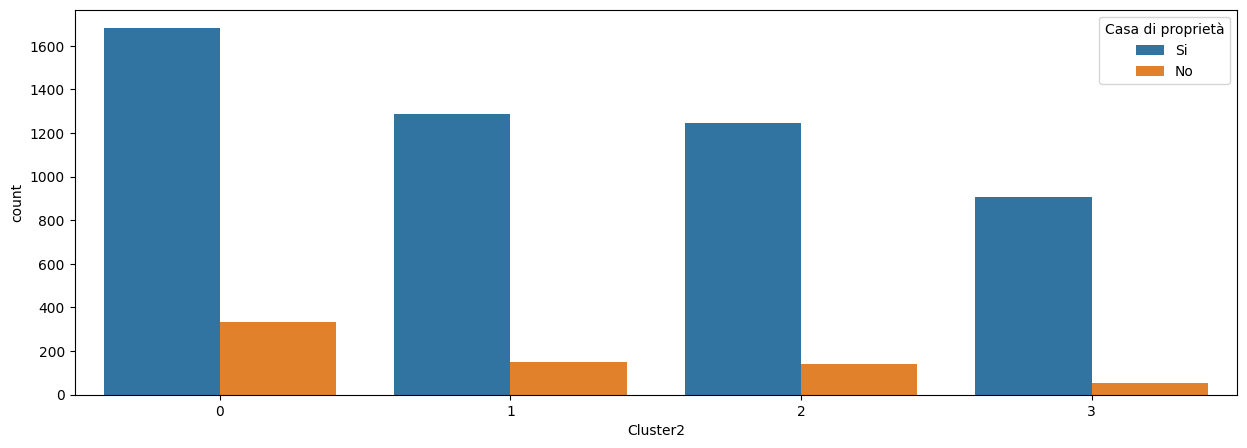

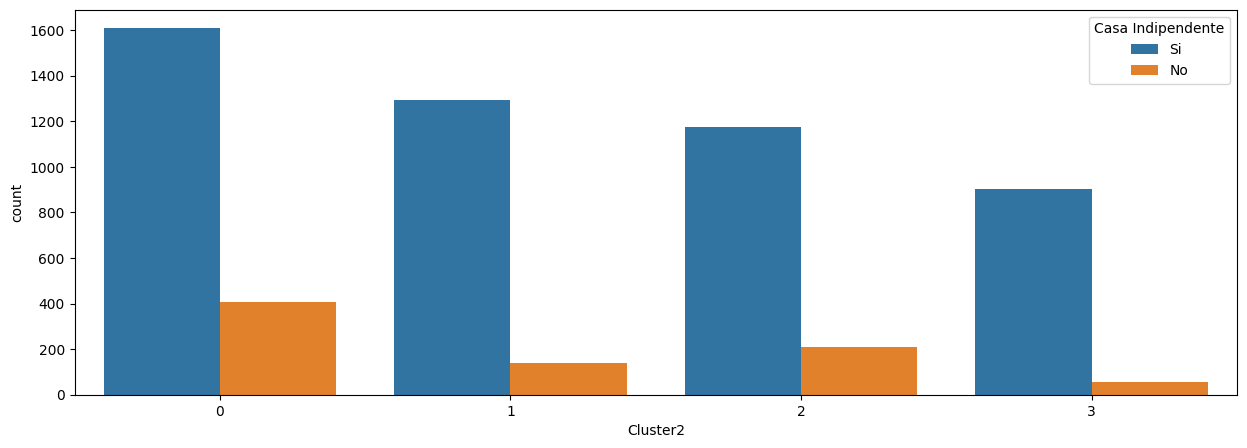

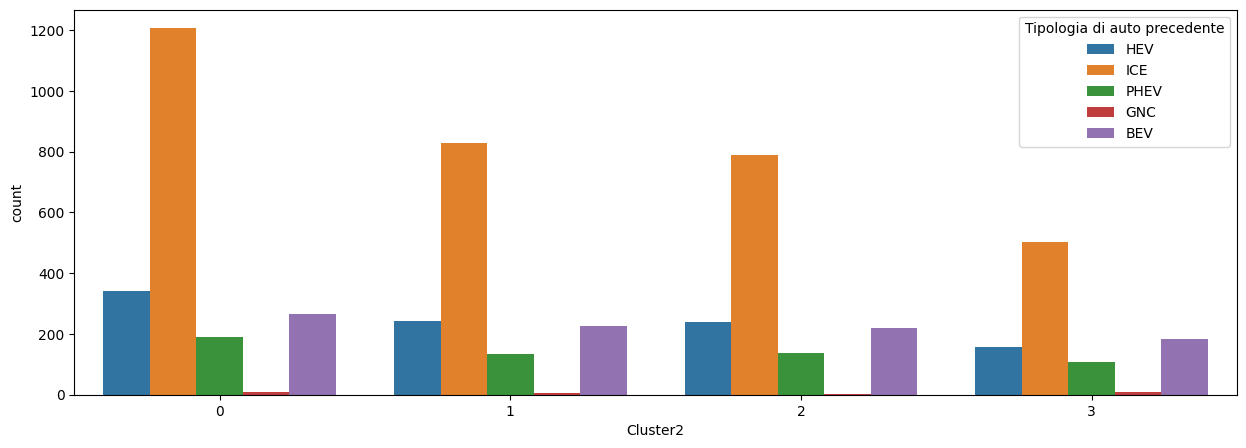

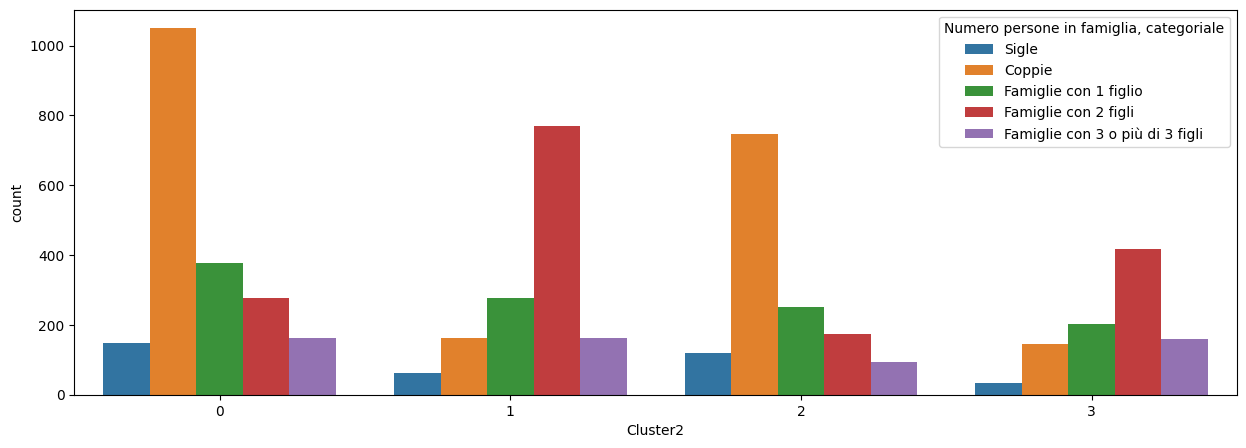

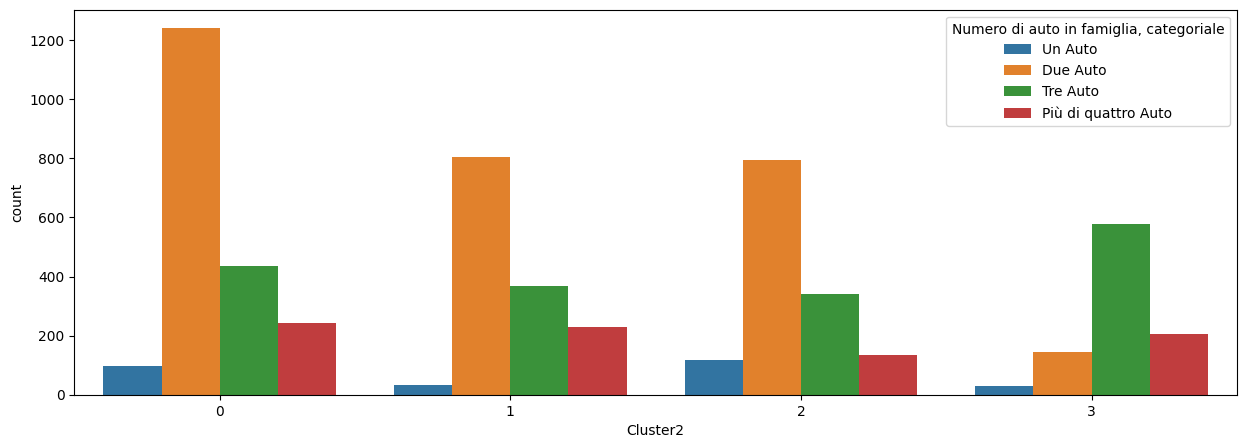

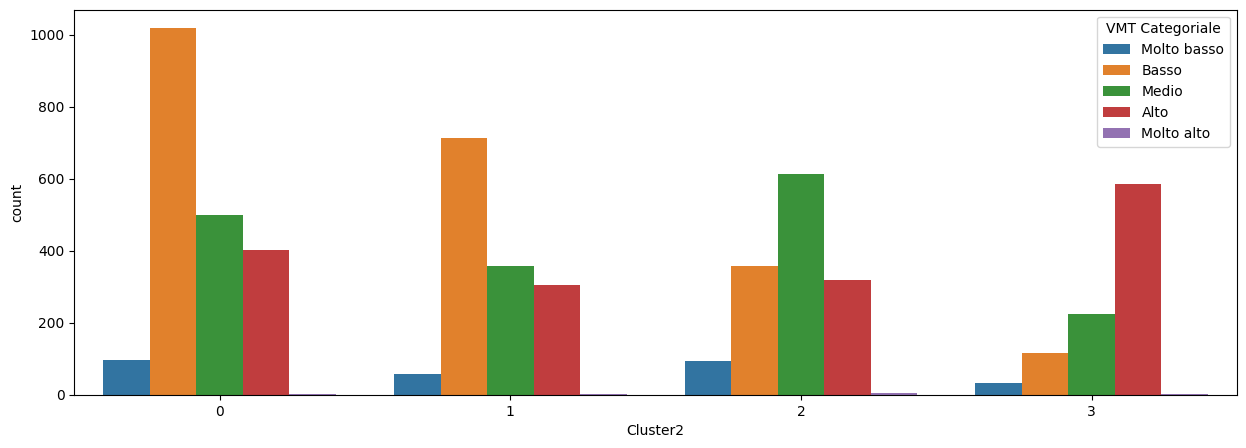

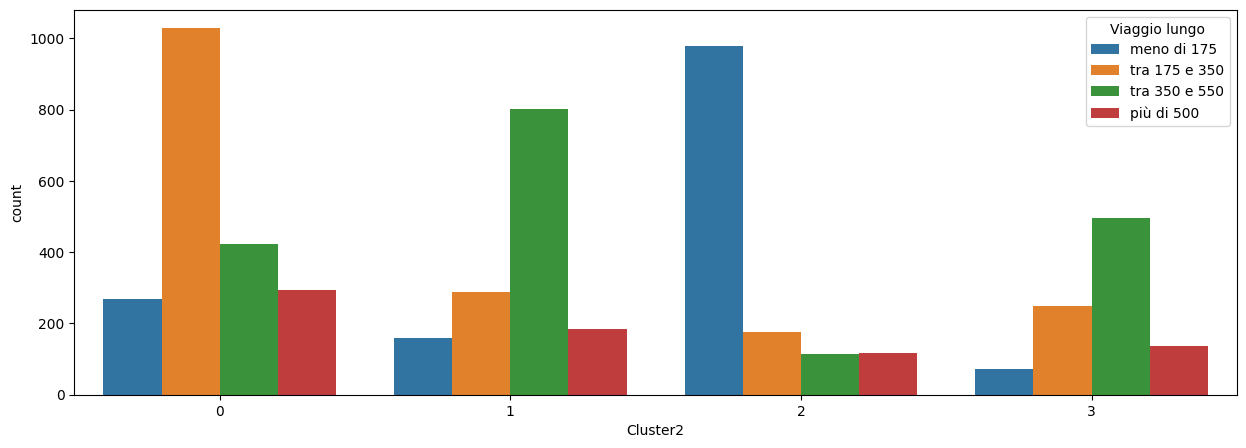

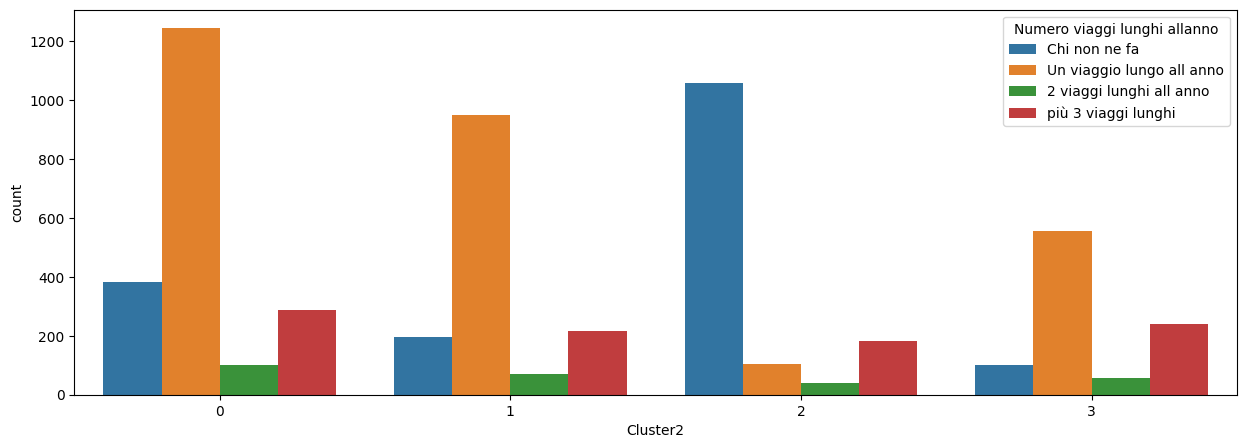

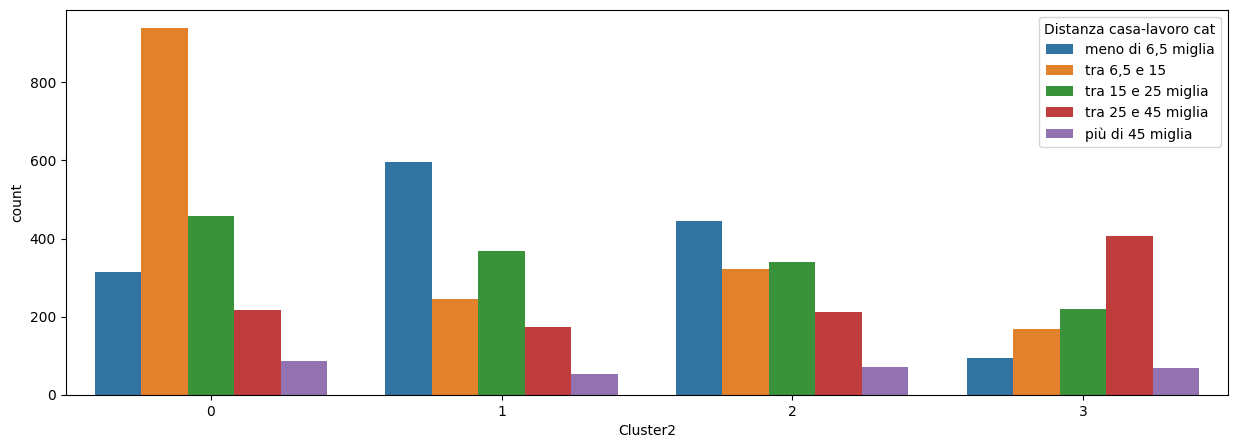

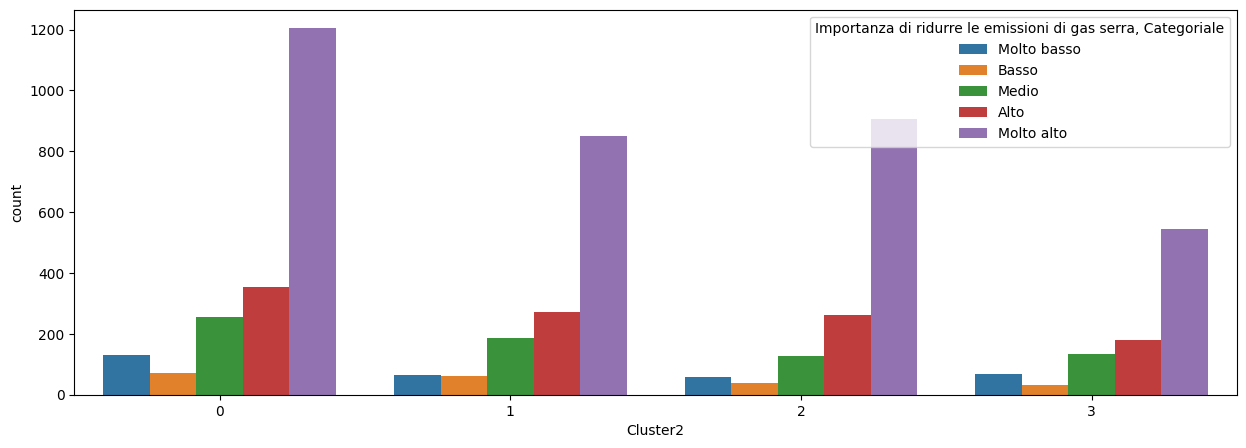

In [ ]:
all_features2 = data_BEV.columns.tolist()

#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]

for col in all_features2:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster2',hue=col, data = data_BEV)
    plt.show()

## Gerarchico

In [ ]:
data_ricercatore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere_                                                       10695 non-null  object 
 1   Genere                                                        10695 non-null  int64  
 2   Età                                                           10695 non-null  int64  
 3   Classe d'età                                                  10695 non-null  object 
 4   Classe d'età: <25 vs 45-54                                    10695 non-null  int64  
 5   Classe d'età: 25-34 vs 45-54                                  10695 non-null  int64  
 6   Classe d'età: 35-44 vs 45-54                                  10695 non-null  int64  
 7   Classe d'età: 55-64 vs 45-54                                  10695

In [ ]:
data_ger = data_ricercatore.drop(columns=['Genere_', 'Età', "Classe d'età", 'Reddito familiare', "Classe Reddito Familiare", "Livello di istruzione", "Auto", "Tipologia"])

In [ ]:
data_ger.head()

,Genere,Classe d'età: <25 vs 45-54,Classe d'età: 25-34 vs 45-54,Classe d'età: 35-44 vs 45-54,Classe d'età: 55-64 vs 45-54,Classe d'età: 65-74 vs 45-54,Classe d'età: 75-79 vs 45-54,Classe d'età: >80 vs 45-54,Classe Reddito Familiare: Medio-Bassa vs Media,Classe Reddito Familiare: Medio-Alta vs Media,...,Auto precedente: PHEV,Auto precedente: BEV,Auto precedente: HEV,Auto precedente: GNC,Auto precedente: ICE,Importanza di ridurre le emissioni di gas serra,Viaggio più lungo negli ultimi 12 mesi,Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi,Distanza casa-lavoro,VMT annuo
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,"2,52",483.14,0.0,0.01,14622
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,"2,76",568.09,1.0,10.69,"9197,142857"
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,"2,6",255.16,0.0,17.63,"5082,352941"
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,"1,23",312.78,1.0,3.53,"13025,45455"
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,"1,08",125.79,1.0,28.05,18000


In [ ]:
data_BEV_ger = data_ger[data_ger['BEV dummy'] == 1]

In [ ]:
data_BEV_ger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5802 entries, 284 to 10694
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere                                                        5802 non-null   int64  
 1   Classe d'età: <25 vs 45-54                                    5802 non-null   int64  
 2   Classe d'età: 25-34 vs 45-54                                  5802 non-null   int64  
 3   Classe d'età: 35-44 vs 45-54                                  5802 non-null   int64  
 4   Classe d'età: 55-64 vs 45-54                                  5802 non-null   int64  
 5   Classe d'età: 65-74 vs 45-54                                  5802 non-null   int64  
 6   Classe d'età: 75-79 vs 45-54                                  5802 non-null   int64  
 7   Classe d'età: >80 vs 45-54                                    5802 non-

In [ ]:
for column in data_BEV_ger.columns:
    # Check if the column is of object type (likely string)
    if data_BEV_ger[column].dtype == 'object':
        # Attempt to convert the column to numeric, replacing commas with periods
        try:
            data_BEV_ger[column] = pd.to_numeric(data_BEV_ger[column].str.replace(',', '.'))
        except ValueError:
            # If conversion fails for any reason, print a warning and skip the column
            print(f"Warning: Could not convert column '{column}' to numeric. Skipping.")

<ipython-input-35-c55c511c37e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_ger[column] = pd.to_numeric(data_BEV_ger[column].str.replace(',', '.'))


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_BEV_ger)

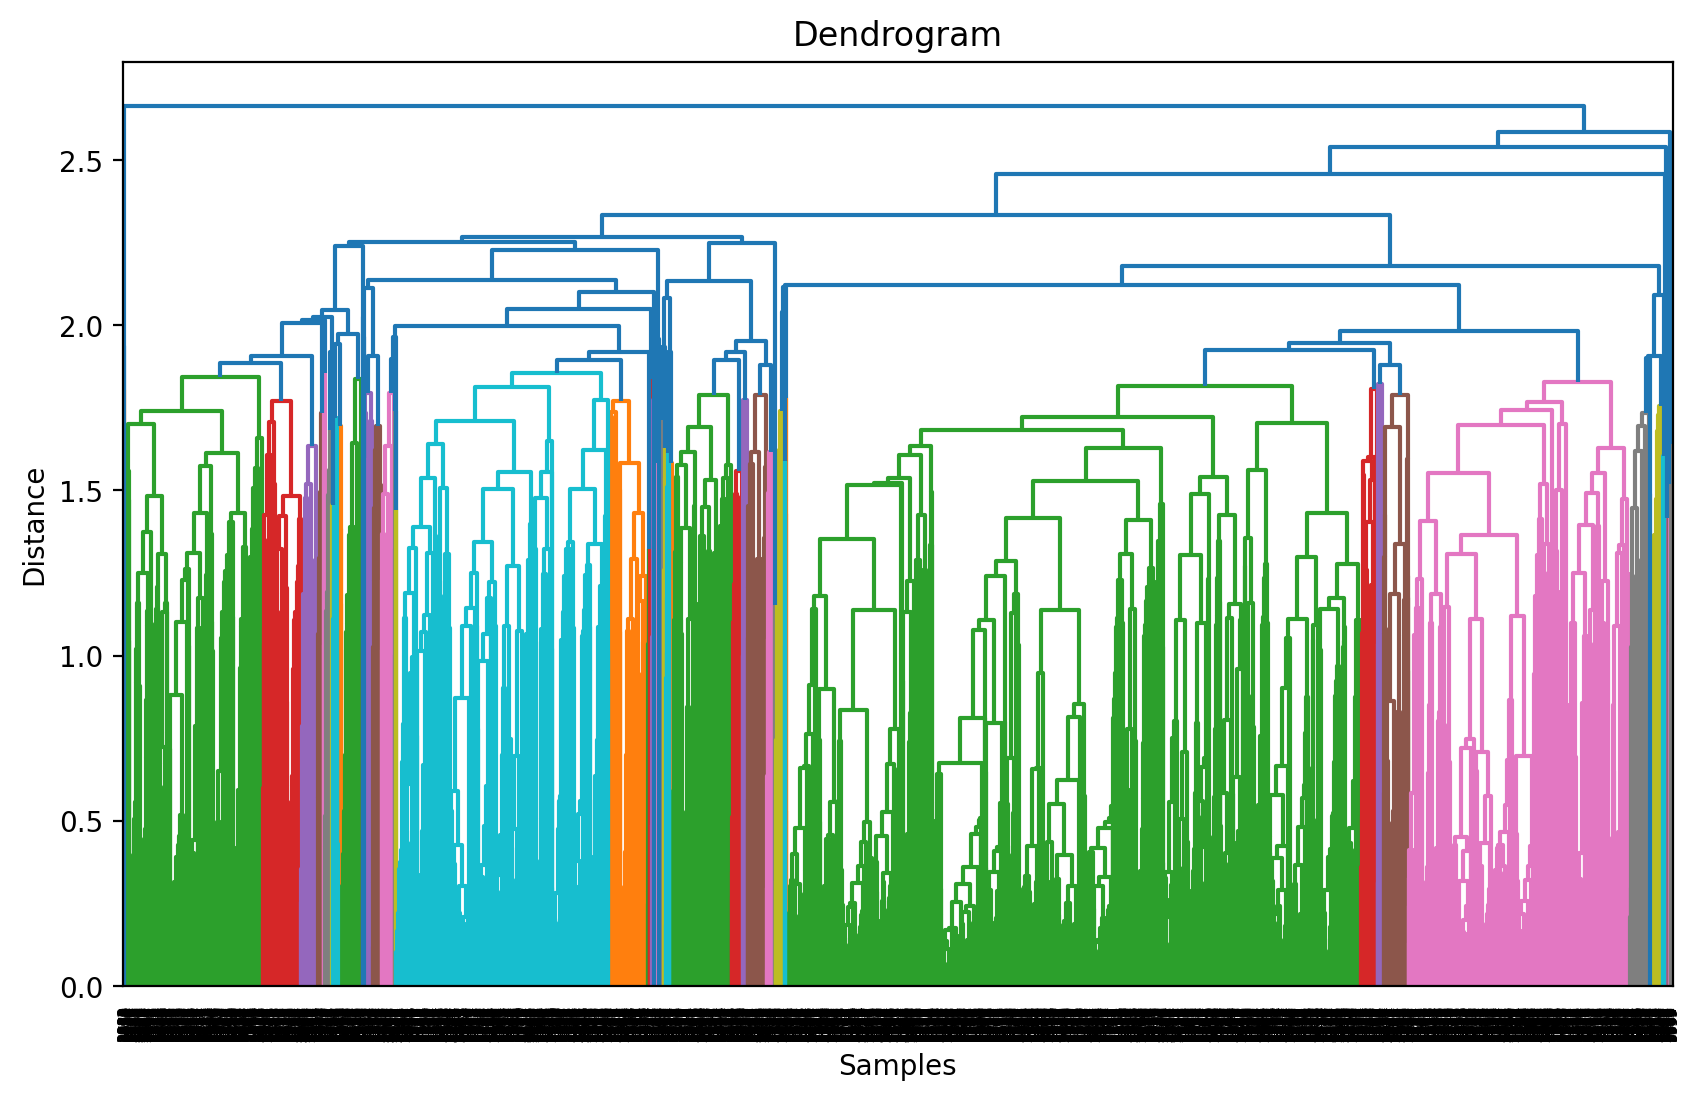

In [ ]:
linked = linkage(X_scaled, method='average')


plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

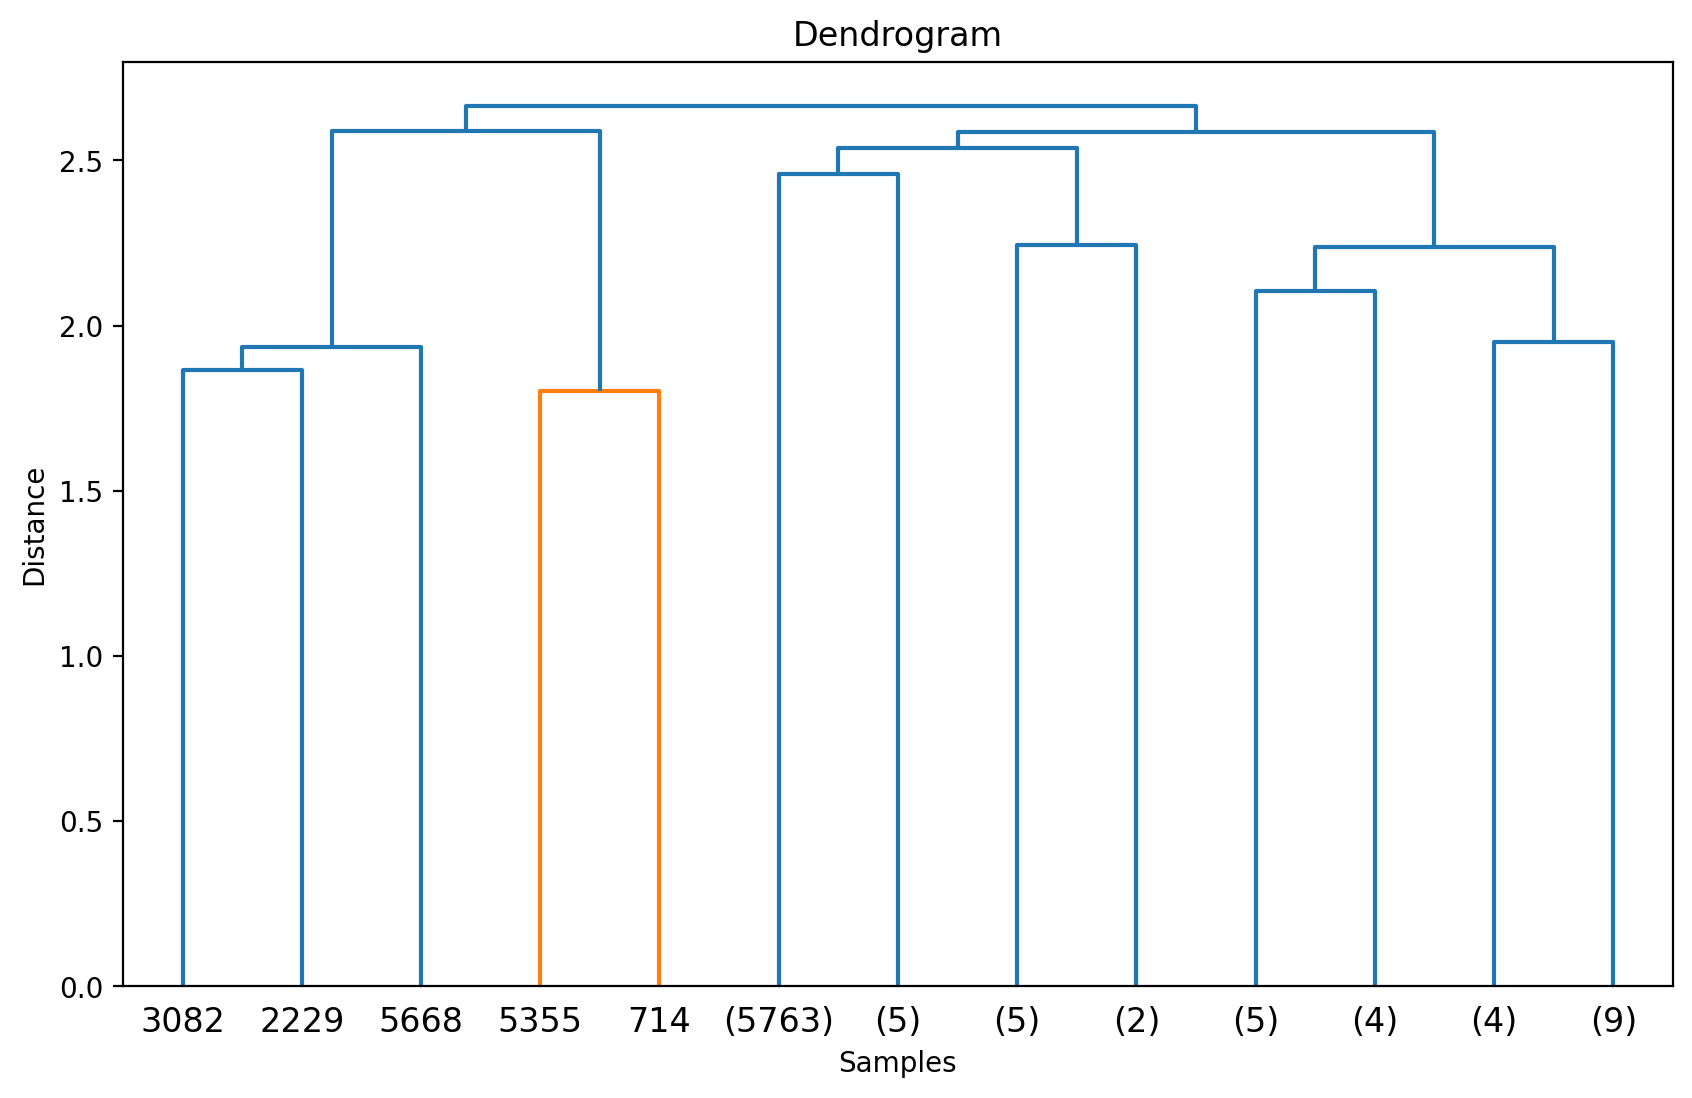

In [ ]:
##Troppo grande! Tronchiamo il dendrogramma
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
##Quale potrebbe essere un buon numero di cluster? Diciamo che 4 potrebbe andare bene, quindi tagliamo alla distance = 1.1
from scipy.cluster.hierarchy import fcluster
threshold_distance = 2.5

cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assegnamo i cluster labels al DataFrame: di fatto, stiamo aggiungendo una colonna al DataFrame
data_BEV_ger['cluster'] = cluster_labels

<ipython-input-43-0e0c98ddd0c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_ger['cluster'] = cluster_labels


In [ ]:
##Vediamo a quali cluster sono associate le singole osservazioni
print(data_BEV_ger['cluster'])

284      3
286      3
287      3
289      3
290      3
        ..
10686    3
10687    3
10689    1
10693    3
10694    3
Name: cluster, Length: 5802, dtype: int32


In [ ]:
##Visualizziamo i cluster (e le relative osservazioni) in uno scatterplot
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.title('Visualizing the clusters')


plt.show()

## prova 2

In [ ]:
data_BEV_1 = data_orgiginale[data_orgiginale['Tipologia'] == 'BEV']
data_BEV_1.drop(columns=['Auto','Tipologia' ], inplace=True)
data_BEV_1.head()

<ipython-input-84-4619931924e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_1.drop(columns=['Auto','Tipologia' ], inplace=True)


,Auto Precedente,Reddito familiare,Importanza di ridurre le emissioni di gas serra,Casa di proprietà,Casa Indipendente,Livello di istruzione,Viaggio più lungo negli ultimi 12 mesi,Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi,Distanza casa-lavoro,VMT annuo,Numero persone in famiglia,Numero di auto in famiglia,Età,Genere
284,HEV,500000,2.63,1,1,Alto,324.95,0.0,22.51,5666.666667,2,3,65,Femmina
286,ICE,125000,-2.97,1,1,Medio-Alto,571.75,0.0,15.58,10992.000000,2,3,55,Femmina
287,ICE,325000,2.87,1,1,Alto,715.41,0.0,8.35,5684.210526,3,5,75,Femmina
289,HEV,225000,1.58,1,1,Alto,120.40,0.0,2.19,5714.285714,2,2,55,Femmina
290,ICE,375000,2.57,1,1,Medio-Alto,407.45,0.0,40.95,16800.000000,5,2,45,Femmina


<ipython-input-72-b7d98ea07025>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_1[feature] = le.fit_transform(data_BEV_1[feature])
<ipython-input-72-b7d98ea07025>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_1[feature] = le.fit_transform(data_BEV_1[feature])
<ipython-input-72-b7d98ea07025>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

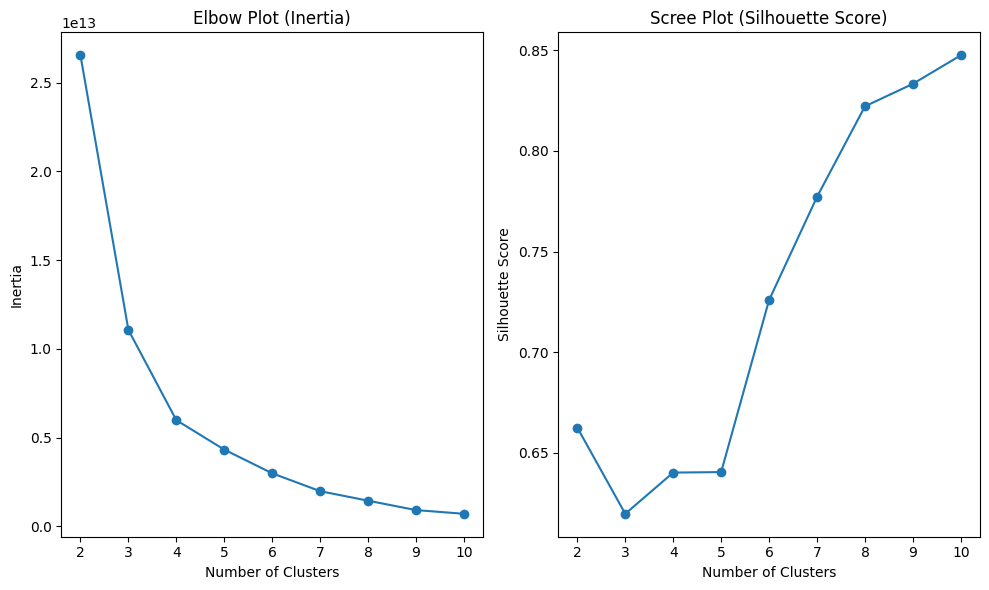

In [ ]:

categorical_features = data_BEV_1.select_dtypes(include=['object']).columns

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through categorical features and encode them
for feature in categorical_features:
    data_BEV_1[feature] = le.fit_transform(data_BEV_1[feature])

# Now you can use the encoded dataset for clustering
n_clusters_range = range(2, 11)
silhouette_scores = []
inertia_values = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_BEV_1)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_BEV_1, labels)
    inertia = kmeans.inertia_
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot (Inertia)')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Scree Plot (Silhouette Score)')

plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
data_BEV_1_scaled = scaler.fit_transform(data_BEV_1)

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters2 = kmeans.fit(data_BEV_1)  # or kmeans.fit(data_BEV_1)
clusters2


TypeError: float() argument must be a string or a real number, not 'KMeans'

In [ ]:
# Get the cluster labels
labels = kmeans.labels_

In [ ]:
data_BEV_1.insert(0, "Cluster", clusters2, True)
data_BEV_1.head()

,Cluster,Cluster,Auto Precedente,Reddito familiare,Importanza di ridurre le emissioni di gas serra,Casa di proprietà,Casa Indipendente,Livello di istruzione,Viaggio più lungo negli ultimi 12 mesi,Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi,Distanza casa-lavoro,VMT annuo,Numero persone in famiglia,Numero di auto in famiglia,Età,Genere,cluster
284,"KMeans(n_clusters=4, random_state=42)","KMeans(n_clusters=4, random_state=42)",2,500000,2.63,1,1,0,324.95,0.0,22.51,5666.666667,2,3,65,0,1
286,"KMeans(n_clusters=4, random_state=42)","KMeans(n_clusters=4, random_state=42)",3,125000,-2.97,1,1,2,571.75,0.0,15.58,10992.000000,2,3,55,0,0
287,"KMeans(n_clusters=4, random_state=42)","KMeans(n_clusters=4, random_state=42)",3,325000,2.87,1,1,0,715.41,0.0,8.35,5684.210526,3,5,75,0,2
289,"KMeans(n_clusters=4, random_state=42)","KMeans(n_clusters=4, random_state=42)",2,225000,1.58,1,1,0,120.40,0.0,2.19,5714.285714,2,2,55,0,2
290,"KMeans(n_clusters=4, random_state=42)","KMeans(n_clusters=4, random_state=42)",3,375000,2.57,1,1,2,407.45,0.0,40.95,16800.000000,5,2,45,0,1


ValueError: Could not interpret value `Cluster` for `x`. An entry with this name does not appear in `data`.

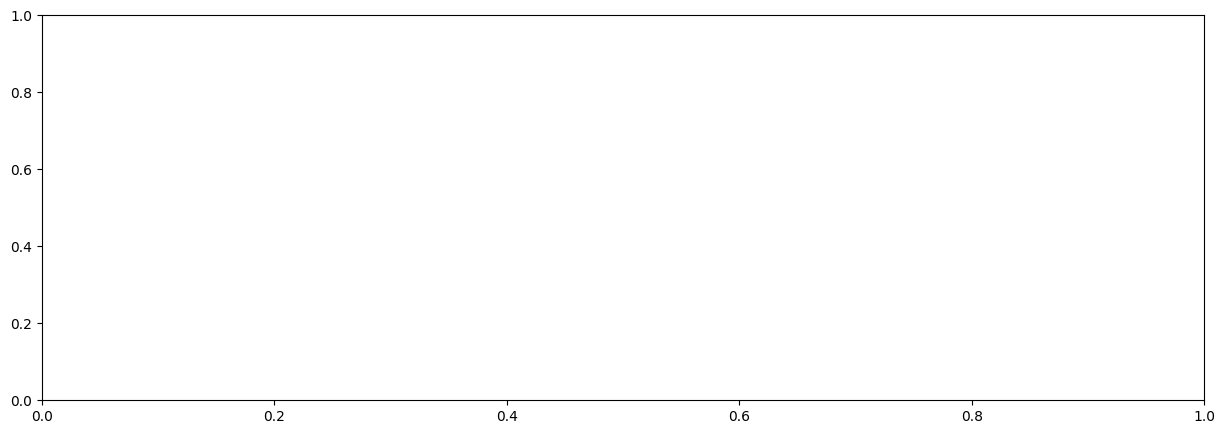

In [ ]:
all_features2 = data_BEV_1.columns.tolist()

for col in all_features2:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_BEV_1)
    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data_BEV_1_scaled, kmeans.labels_)
print(f"Silhouette score: {silhouette:.3f}")

Silhouette score: 0.139


In [ ]:
clusters = kmode.fit_predict(data)
clusters

array([[-0.39331381,  2.28360952,  0.58107178, ...,  1.19677059,
        -0.55162391,  0.25969536],
       [ 0.45943185, -0.77529713, -2.97967989, ...,  0.39718912,
        -0.55162391, -0.86176936],
       [ 0.45943185,  0.85611975,  0.73367542, ...,  1.99635205,
        -0.55162391,  1.38116008],
       ...,
       [ 1.31217751, -0.36744291,  0.65101512, ..., -2.00155528,
        -0.55162391, -0.86176936],
       [-2.09880512,  0.85611975, -1.07213435, ...,  0.39718912,
         1.81282932,  1.38116008],
       [-2.09880512, -0.77529713,  0.79726028, ...,  0.39718912,
        -0.55162391, -0.86176936]])

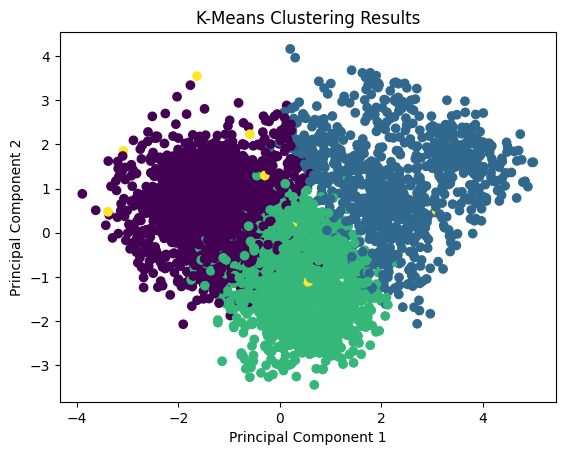

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_BEV_1_pca = pca.fit_transform(data_BEV_1_scaled)

plt.scatter(data_BEV_1_pca[:, 0], data_BEV_1_pca[:, 1], c=kmeans.labels_)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Results")
plt.show()

# Scaling Multidimensionale

In [ ]:
print(", ".join([f'"{col}"' for col in data_conv.columns]))


"Auto", "Tipologia", "BEV dummy", "Auto Precedente", "Reddito familiare", "Importanza di ridurre le emissioni di gas serra", "Casa di proprietà", "Casa Indipendente", "Livello di istruzione", "Livello di istruzione - Medio-Basso vs Alto", "Livello di istruzione - Basso vs Alto", "Livello di istruzione - Medio-Alto vs Alto", "Viaggio più lungo negli ultimi 12 mesi", "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi", "Distanza casa-lavoro", "VMT annuo", "Numero persone in famiglia", "Numero di auto in famiglia", "Età", "Genere_dummy"


In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

# Load your dataset
data_sca = data_conv[["Reddito familiare", "Importanza di ridurre le emissioni di gas serra", "Livello di istruzione", "Viaggio più lungo negli ultimi 12 mesi", "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi", "Distanza casa-lavoro", "VMT annuo", "Numero persone in famiglia", "Numero di auto in famiglia", "Età", "Genere_dummy"]]

In [ ]:
mds = MDS(n_components=2)
X_reduced = mds.fit_transform(data_sca)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("MDS Visualization of Data")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()